***IMPORT NECCESSARY LIBRARIES***

In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [173]:
anime = pd.read_csv('/anime (1).csv')
anime

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


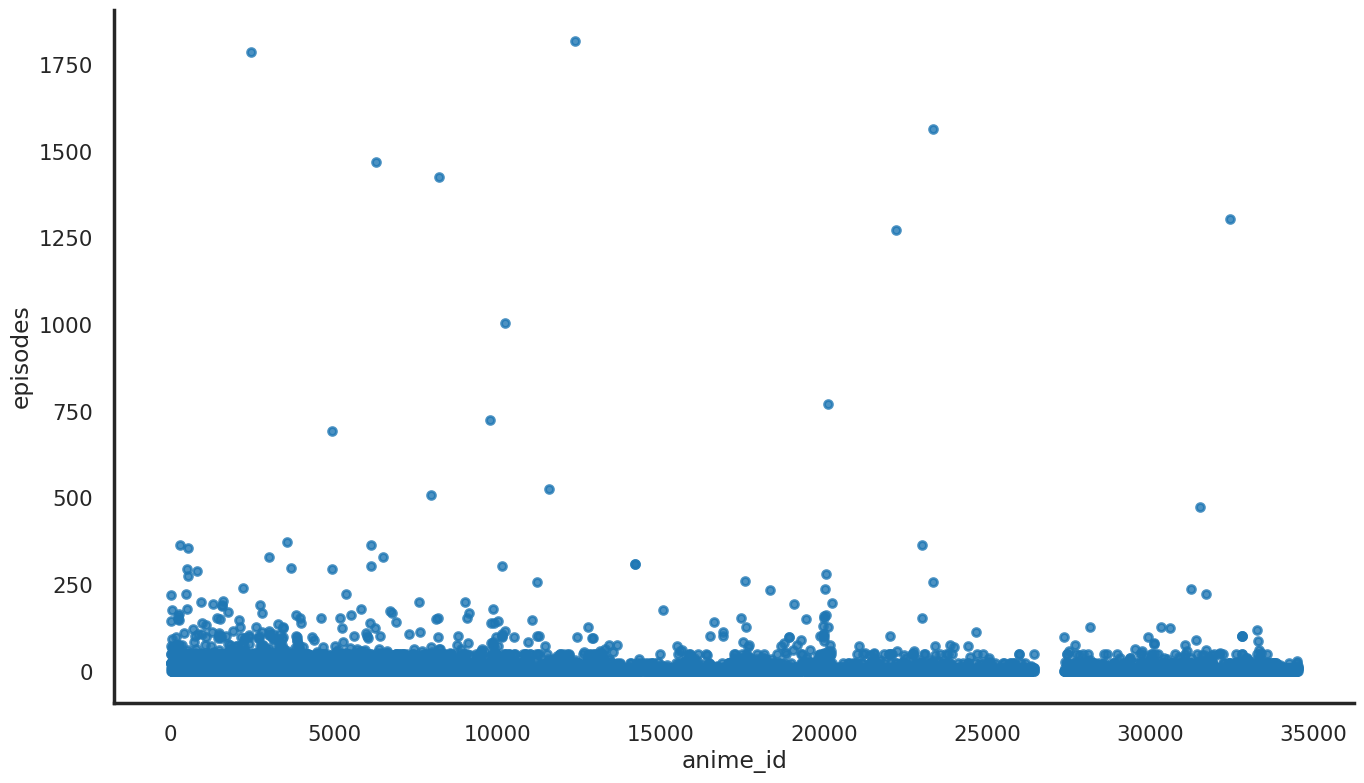

In [174]:
# @title anime_id vs episodes

from matplotlib import pyplot as plt
anime.plot(kind='scatter', x='anime_id', y='episodes', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [175]:
rating = pd.read_csv('/rating.csv')
rating

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
871121,7942,659,4
871122,7942,669,4
871123,7942,732,3
871124,7942,743,8


***DATASET SUMMARY***

In [176]:
print(f"Shape of The Anime Dataset : {anime.shape}")
print(f"\nGlimpse of The Dataset :")
anime.head().style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

Shape of The Anime Dataset : (12294, 7)

Glimpse of The Dataset :


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.370000,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Military, Shounen",TV,64,9.260000,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen",TV,51,9.250000,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.170000,673572
4,9969,Gintama',"Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen",TV,51,9.160000,151266


In [177]:
print(f"Informations About Anime Dataset :\n")
print(anime.info())

Informations About Anime Dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  int64  
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 672.5+ KB
None


In [178]:
print(f"Shape of The Rating Dataset : {rating.shape}")
print(f"\nGlimpse of The Dataset :")
rating.head().style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

Shape of The Rating Dataset : (871126, 3)

Glimpse of The Dataset :


,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [179]:
print(f"Informations About Rating Dataset :\n")
print(rating.info())

Informations About Rating Dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871126 entries, 0 to 871125
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   user_id   871126 non-null  int64
 1   anime_id  871126 non-null  int64
 2   rating    871126 non-null  int64
dtypes: int64(3)
memory usage: 19.9 MB
None


In [180]:
print(f"Summary of The Anime Dataset :")
anime.describe().T.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

Summary of The Anime Dataset :


,count,mean,std,min,25%,50%,75%,max
anime_id,12294.000000,14058.221653,11455.294701,1.000000,3484.250000,10260.500000,24794.500000,34527.000000
episodes,12294.000000,12.371970,46.212749,1.000000,1.000000,2.000000,12.000000,1818.000000
rating,12064.000000,6.473902,1.026746,1.670000,5.880000,6.570000,7.180000,10.000000
members,12294.000000,18071.338864,54820.676925,5.000000,225.000000,1550.000000,9437.000000,1013917.000000


In [181]:
anime.describe(include=object).T.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

,count,unique,top,freq
name,12294,12292,Shi Wan Ge Leng Xiaohua,2
genre,12232,3264,Hentai,823
type,12269,6,TV,3787


***DATA PRE-PROCESSING***

In [182]:
print("Null Values of Anime Dataset :")
anime.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

Null Values of Anime Dataset :


,anime_id,name,genre,type,episodes,rating,members
0,0,0,62,25,0,230,0


In [183]:
print("After Dropping, Null Values of Anime Dataset :")
anime.dropna(axis = 0, inplace = True)
anime.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

After Dropping, Null Values of Anime Dataset :


,anime_id,name,genre,type,episodes,rating,members
0,0,0,0,0,0,0,0


In [184]:
dup_anime = anime[anime.duplicated()].shape[0]
print(f"There are {dup_anime} duplicate entries among {anime.shape[0]} entries in anime dataset.")

There are 0 duplicate entries among 12017 entries in anime dataset.


In [185]:
print(f"Summary of The Rating Dataset :")
rating.describe().T.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

Summary of The Rating Dataset :


,count,mean,std,min,25%,50%,75%,max
user_id,871126.000000,4242.855288,2311.334378,1.000000,2243.000000,4475.000000,6239.000000,7942.000000
anime_id,871126.000000,8617.966930,8839.038921,1.000000,1107.000000,5530.000000,13659.000000,34325.000000
rating,871126.000000,6.187968,3.670861,-1.000000,6.000000,7.000000,9.000000,10.000000


In [186]:
print("Null Values of Rating Dataset :")
rating.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

Null Values of Rating Dataset :


,user_id,anime_id,rating
0,0,0,0


In [187]:
dup_rating = rating[rating.duplicated()].shape[0]
print(f"There are {dup_rating} duplicate entries among {rating.shape[0]} entries in rating dataset.")

rating.drop_duplicates(keep='first',inplace=True)
print(f"\nAfter removing duplicate entries there are {rating.shape[0]} entries in this dataset.")

There are 0 duplicate entries among 871126 entries in rating dataset.

After removing duplicate entries there are 871126 entries in this dataset.


**MERGING ANIME AND RATING DATASET FOR INSIGHTS**

In [188]:
fulldata = pd.merge(anime,rating,on="anime_id",suffixes= [None, "_user"])
fulldata = fulldata.rename(columns={"rating_user": "user_rating"})

print(f"Shape of The Merged Dataset : {fulldata.shape}")
print(f"\nGlimpse of The Merged Dataset :")

fulldata.head().style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

Shape of The Merged Dataset : (871113, 9)

Glimpse of The Merged Dataset :


,anime_id,name,genre,type,episodes,rating,members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.370000,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.370000,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.370000,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.370000,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.370000,200630,278,-1


In [189]:
MRPU = rating.groupby(['user_id']).mean().reset_index()
MRPU['mean_rating'] = MRPU['rating']

MRPU.drop(['anime_id','rating'],axis=1, inplace=True)

In [190]:
rating = pd.merge(rating,MRPU,on=['user_id','user_id'])

In [191]:
rating = rating.drop(rating[((rating.rating < rating.mean_rating) & (rating.rating < 8))].index)

In [192]:
rating = rating.rename({'rating':'userRating'}, axis='columns')

In [193]:
user_anime = pd.crosstab(fulldata['user_id'], fulldata['name'])

In [194]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(user_anime)
pca_samples = pca.transform(user_anime)

In [195]:
ps = pd.DataFrame(pca_samples)

In [196]:
tocluster = pd.DataFrame(ps[[0,1,2]])

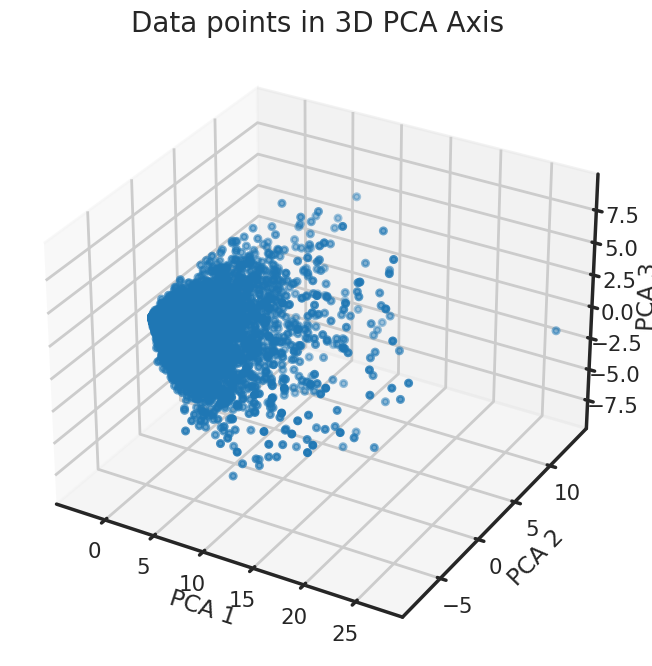

In [197]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Assuming toCluster is a DataFrame with columns for PCA components
# Ensure correct column names or indices are used
ax.scatter(tocluster.iloc[:, 0], tocluster.iloc[:, 1], tocluster.iloc[:, 2])

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')

plt.title('Data points in 3D PCA Axis', fontsize=20)
plt.show()



**SELECTING K FOR K-MEANS**

In [198]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scores = []
inertia_list = np.empty(8)

for i in range(2,8):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(tocluster)
    inertia_list[i] = kmeans.inertia_
    scores.append(silhouette_score(tocluster, kmeans.labels_))

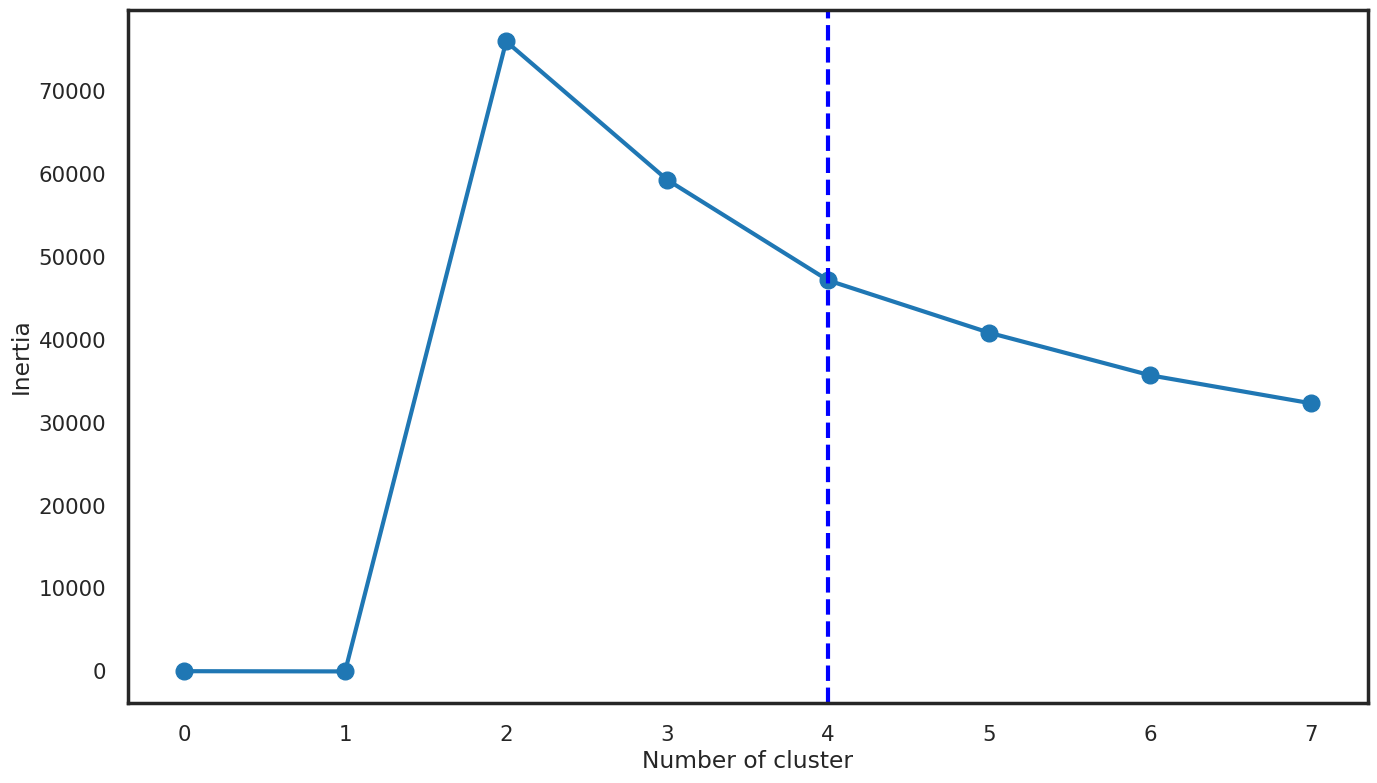

In [199]:
plt.plot(range(0,8),inertia_list,'-o')
plt.xlabel('Number of cluster')
plt.axvline(x=4, color='blue', linestyle='--')
plt.ylabel('Inertia')
plt.show()

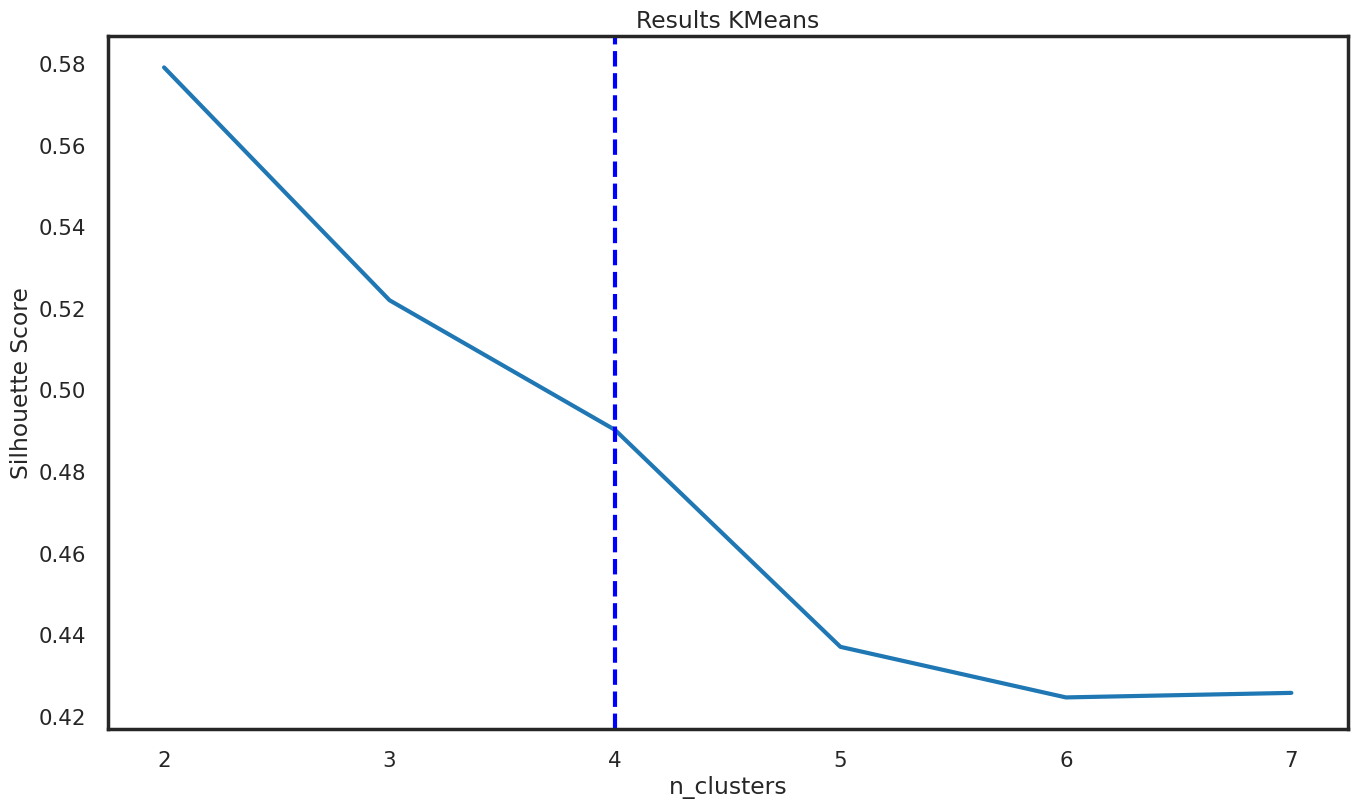

In [200]:
plt.plot(range(2,8), scores);
plt.title('Results KMeans')
plt.xlabel('n_clusters');
plt.axvline(x=4, color='blue', linestyle='--')
plt.ylabel('Silhouette Score');
plt.show()

***K-MEANS CLUSTERING***

In [201]:
from sklearn.cluster import KMeans

clusterer = KMeans(n_clusters=4,random_state=30).fit(tocluster)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(tocluster)

print(centers)

[[-1.79317773 -0.08958813  0.0532265 ]
 [ 2.39123864 -1.73189579 -0.52554566]
 [ 2.30008367  3.52849143  0.14520085]
 [ 9.85732595 -1.40285025  0.68089859]]


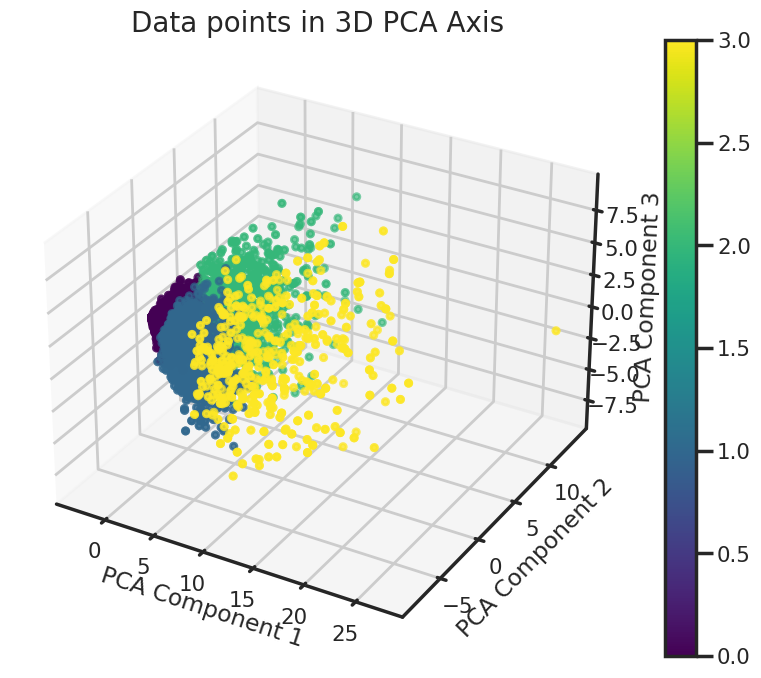

In [202]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create the plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Check and adjust the indices if needed, make sure they match the dimensions of your PCA components
ax.scatter(tocluster.iloc[:, 0], tocluster.iloc[:, 1], tocluster.iloc[:, 2], c=c_preds, cmap='viridis')

# Adding colorbar for reference
sc = ax.scatter(tocluster.iloc[:, 0], tocluster.iloc[:, 1], tocluster.iloc[:, 2], c=c_preds, cmap='viridis')
plt.colorbar(sc)

# Label the axes
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

# Set title
plt.title('Data points in 3D PCA Axis', fontsize=20)

# Show plot
plt.show()


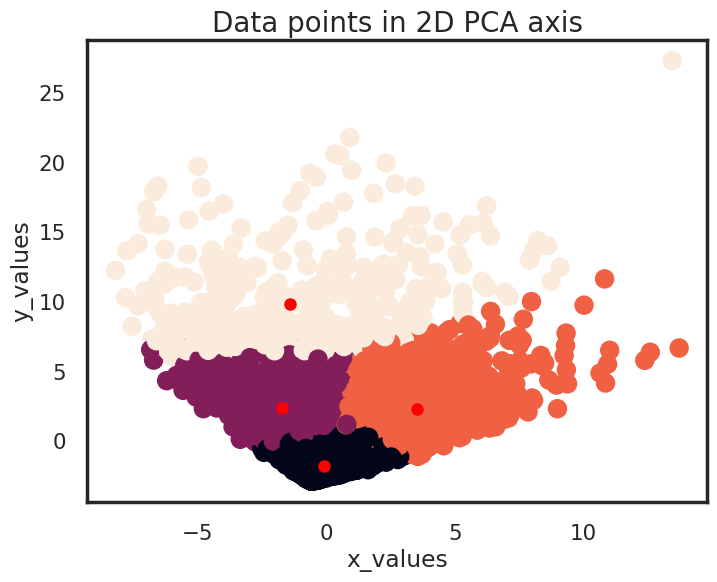

In [203]:
fig = plt.figure(figsize=(8,6))
plt.scatter(tocluster[1],tocluster[0],c = c_preds)
for ci,c in enumerate(centers):
    plt.plot(c[1], c[0], 'o', markersize=8, color='red', alpha=1)

plt.xlabel('x_values')
plt.ylabel('y_values')

plt.title('Data points in 2D PCA axis', fontsize=20)
plt.show()

***CHARACTERISTICS OF EACH CLUSTERS***

In [204]:
user_anime['cluster'] = c_preds

In [205]:
c0 = user_anime[user_anime['cluster']==0].drop('cluster',axis=1).mean()
c1 = user_anime[user_anime['cluster']==1].drop('cluster',axis=1).mean()
c2 = user_anime[user_anime['cluster']==2].drop('cluster',axis=1).mean()
c3 = user_anime[user_anime['cluster']==3].drop('cluster',axis=1).mean()

***CLUSTER 0 CHARACTERISTICS***

In [206]:
c0.sort_values(ascending=False)[0:15]

name
Death Note                            0.443407
Shingeki no Kyojin                    0.304688
Sword Art Online                      0.276867
Naruto                                0.276677
Elfen Lied                            0.270579
Fullmetal Alchemist                   0.266387
Code Geass: Hangyaku no Lelouch       0.252477
Sen to Chihiro no Kamikakushi         0.239901
Ouran Koukou Host Club                0.217416
Code Geass: Hangyaku no Lelouch R2    0.212271
Fullmetal Alchemist: Brotherhood      0.199695
Angel Beats!                          0.190358
Howl no Ugoku Shiro                   0.185595
Dragon Ball Z                         0.174733
Mononoke Hime                         0.168636
dtype: float64

In [207]:
def createAnimeInfoList(animelist):
    episode_list = list()
    genre_list = list()
    member_list = list()
    rating_list= list()
    for x in anime['name']:
        if x in animelist:
            temp = []
            episode_list.append(anime[anime['name']==x].episodes.values.astype(int))
            member_list.append(anime[anime['name']==x].members.values.astype(int))
            rating_list.append(anime[anime['name']==x].rating.values.astype(int))
            for y in anime[anime['name']==x].genre.values:
                 temp.append(y)
            genre_list.append(', '.join([str(elem) for elem in temp]))
    return genre_list,episode_list,rating_list,member_list

In [208]:
def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split(','):
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue
        for s in [s for s in liste_keywords if s in liste]:
            if pd.notnull(s): keyword_count[s] += 1

    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

In [209]:
animelist = list(c0.index)
data = pd.DataFrame()
data['genre'],data['episode'],data['rating'],data['member'] =  createAnimeInfoList(animelist)

In [210]:
set_keywords = set()
for liste_keywords in data['genre'].str.split(',').values:
    if isinstance(liste_keywords, float): continue  # only happen if liste_keywords = NaN
    set_keywords = set_keywords.union(liste_keywords)

In [211]:
from wordcloud import WordCloud

def makeCloud(Dict,name,color):
    words = dict()

    for s in Dict:
        words[s[0]] = s[1]

        wordcloud = WordCloud(
                      width=1500,
                      height=500,
                      background_color=color,
                      max_words=20,
                      max_font_size=500,
                      normalize_plurals=False)
        wordcloud.generate_from_frequencies(words)


    fig = plt.figure(figsize=(12, 8))
    plt.title(name)
    plt.imshow(wordcloud)
    plt.axis('off')

    plt.show()

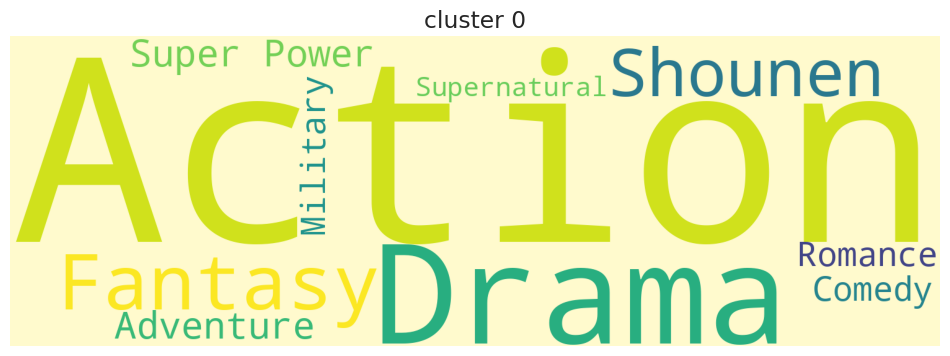

In [212]:
c0_animelist = list(c0.sort_values(ascending=False)[0:15].index)
c0_data = pd.DataFrame()
c0_data['genre'],c0_data['episode'],c0_data['rating'],c0_data['member'] =  createAnimeInfoList(c0_animelist)
c0_data.iloc[:,1:4] = c0_data.iloc[:,1:4].astype(int) # change to numeric object to integer
keyword_occurences, dum = count_word(c0_data, 'genre', set_keywords)
makeCloud(keyword_occurences[0:10],"cluster 0","lemonchiffon")

In [213]:
keyword_occurences[0:5]

[['Action', 11],
 [' Drama', 8],
 [' Fantasy', 7],
 [' Shounen', 5],
 [' Super Power', 5]]

In [214]:
print('cluster 0\nAVG episode : {0}\nAVG movie rating : {1}\nAVG member : {2}'
      .format(c0_data['episode'].mean(), c0_data['rating'].mean(),c0_data['member'].mean()))

cluster 0
AVG episode : 54.53333333333333
AVG movie rating : 7.866666666666666
AVG member : 629791.1333333333


***CLUSTER 1***

In [215]:
c1.sort_values(ascending=False)[0:15]

name
Sword Art Online                    0.868717
Shingeki no Kyojin                  0.840210
No Game No Life                     0.730683
Angel Beats!                        0.717929
Death Note                          0.702926
Mirai Nikki (TV)                    0.661665
Toradora!                           0.607652
Tokyo Ghoul                         0.605401
Ao no Exorcist                      0.599400
Noragami                            0.594149
Code Geass: Hangyaku no Lelouch     0.584396
Highschool of the Dead              0.580645
Steins;Gate                         0.580645
Fullmetal Alchemist: Brotherhood    0.576144
Hataraku Maou-sama!                 0.549887
dtype: float64

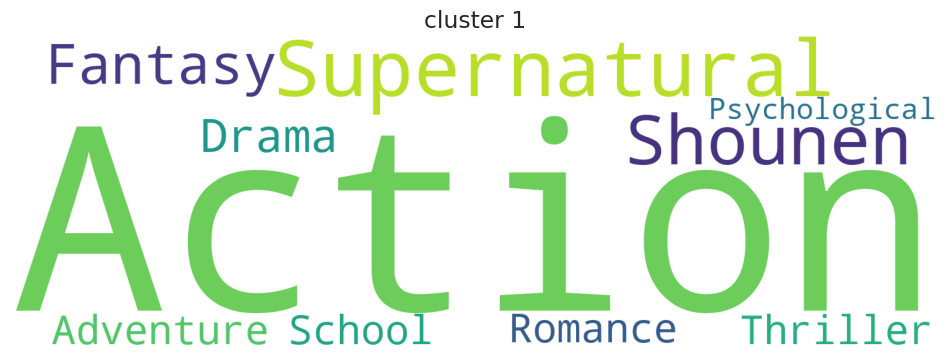

In [216]:
c1_animelist = list(c1.sort_values(ascending=False)[0:15].index)
c1_data = pd.DataFrame()
c1_data['genre'],c1_data['episode'],c1_data['rating'],c1_data['member'] =  createAnimeInfoList(c1_animelist)
c1_data.iloc[:,1:4] = c1_data.iloc[:,1:4].astype(int)
keyword_occurences, dum = count_word(c1_data, 'genre', set_keywords)
makeCloud(keyword_occurences[0:10],"cluster 1","white")

In [217]:
keyword_occurences[0:5]

[['Action', 10],
 [' Supernatural', 8],
 [' Shounen', 6],
 [' Fantasy', 6],
 [' Drama', 4]]

In [218]:
print('cluster 1\nAVG episode : {0}\nAVG movie rating : {1}\nAVG member : {2}'
      .format(c1_data['episode'].mean(), c1_data['rating'].mean(),c1_data['member'].mean()))

cluster 1
AVG episode : 23.333333333333332
AVG movie rating : 7.933333333333334
AVG member : 683927.6


***CLUSTER 2***

In [219]:
c2.sort_values(ascending=False)[0:15]

name
Death Note                               0.797682
Code Geass: Hangyaku no Lelouch          0.787144
Elfen Lied                               0.774499
Fullmetal Alchemist                      0.755532
Suzumiya Haruhi no Yuuutsu               0.741834
Code Geass: Hangyaku no Lelouch R2       0.734457
Neon Genesis Evangelion                  0.645943
Toradora!                                0.639621
Sen to Chihiro no Kamikakushi            0.618546
Full Metal Panic!                        0.598525
Fate/stay night                          0.596417
Clannad                                  0.586934
Darker than Black: Kuro no Keiyakusha    0.582719
Tengen Toppa Gurren Lagann               0.582719
Cowboy Bebop                             0.581665
dtype: float64

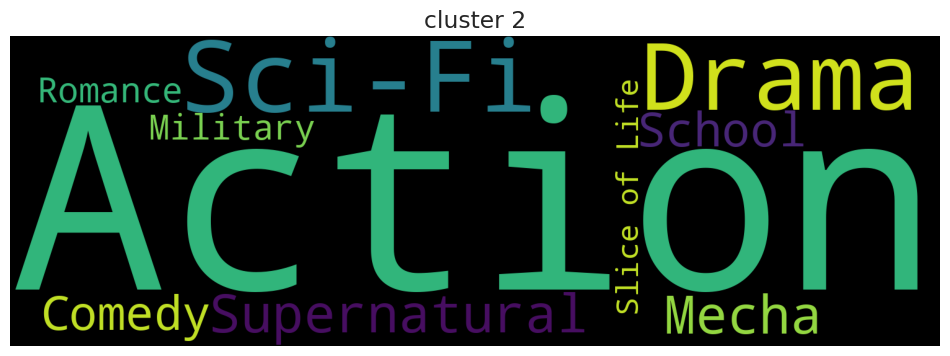

In [220]:
c2_animelist = list(c2.sort_values(ascending=False)[0:15].index)
c2_data = pd.DataFrame()
c2_data['genre'],c2_data['episode'],c2_data['rating'],c2_data['member'] =  createAnimeInfoList(c2_animelist)
c2_data.iloc[:,1:4] = c2_data.iloc[:,1:4].astype(int)
keyword_occurences, dum = count_word(c2_data, 'genre', set_keywords)
makeCloud(keyword_occurences[0:10],"cluster 2","black")

In [221]:
keyword_occurences[0:5]

[['Action', 10],
 [' Sci-Fi', 8],
 [' Drama', 7],
 [' Supernatural', 5],
 [' Mecha', 5]]

In [222]:
c2_data['episode'].mean()

24.4

In [223]:
print('cluster 2\nAVG episode : {0}\nAVG movie rating : {1}\nAVG member : {2}'
      .format(c2_data['episode'].mean(), c2_data['rating'].mean(),c2_data['member'].mean()))

cluster 2
AVG episode : 24.4
AVG movie rating : 7.8
AVG member : 546963.4666666667


***CLUSTER 3***

In [224]:
c3.sort_values(ascending=False)[0:15]


name
Sword Art Online                                       0.927184
Angel Beats!                                           0.922330
Toradora!                                              0.898058
No Game No Life                                        0.888350
Chuunibyou demo Koi ga Shitai!                         0.856796
Hataraku Maou-sama!                                    0.856796
Code Geass: Hangyaku no Lelouch                        0.854369
Shingeki no Kyojin                                     0.847087
Boku wa Tomodachi ga Sukunai                           0.847087
Highschool of the Dead                                 0.844660
Ore no Imouto ga Konnani Kawaii Wake ga Nai            0.839806
Yahari Ore no Seishun Love Comedy wa Machigatteiru.    0.839806
Bakemonogatari                                         0.839806
Steins;Gate                                            0.834951
Code Geass: Hangyaku no Lelouch R2                     0.832524
dtype: float64

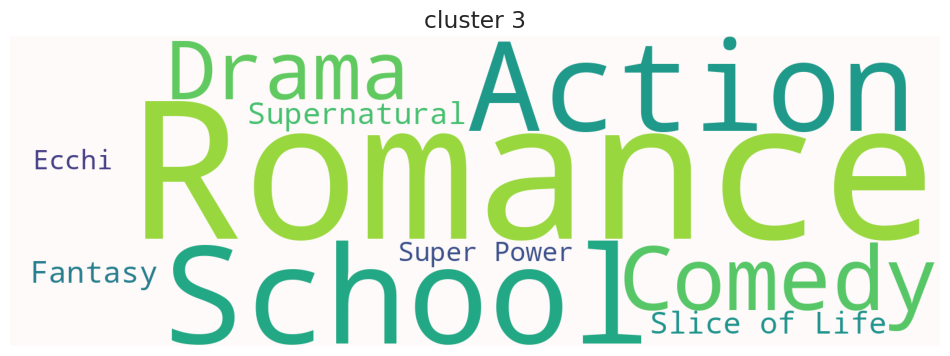

In [225]:
c3_animelist = list(c3.sort_values(ascending=False)[0:15].index)
c3_data = pd.DataFrame()
c3_data['genre'],c3_data['episode'],c3_data['rating'],c3_data['member'] =  createAnimeInfoList(c3_animelist)
c3_data.iloc[:,1:4] = c3_data.iloc[:,1:4].astype(int)
keyword_occurences, dum = count_word(c3_data, 'genre', set_keywords)
makeCloud(keyword_occurences[0:10],"cluster 3","snow")

In [226]:
keyword_occurences[0:5]

[[' Romance', 7], [' School', 6], ['Action', 6], ['Comedy', 6], [' Drama', 5]]

In [227]:
print('cluster 3\nAVG episode : {0}\nAVG movie rating : {1}\nAVG member : {2}'
      .format(c3_data['episode'].mean(), c3_data['rating'].mean(),c3_data['member'].mean()))

cluster 3
AVG episode : 17.533333333333335
AVG movie rating : 7.733333333333333
AVG member : 568497.1333333333


***CUSTOM PALLETE FOR VISUALIZATION***

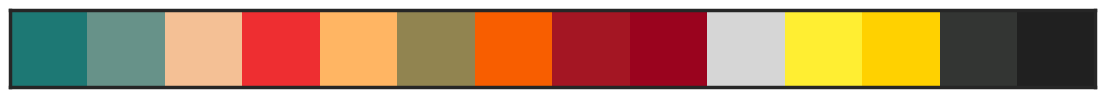

In [228]:
sns.set_style("white")
sns.set_context("poster",font_scale = .7)

palette = ["#1d7874","#679289","#f4c095","#ee2e31","#ffb563","#918450","#f85e00","#a41623","#9a031e","#d6d6d6","#ffee32","#ffd100","#333533","#202020"]

sns.palplot(sns.color_palette(palette))
plt.show()

***ANIME DATA VISUALIZATIONS WITH RATINGS TOO***

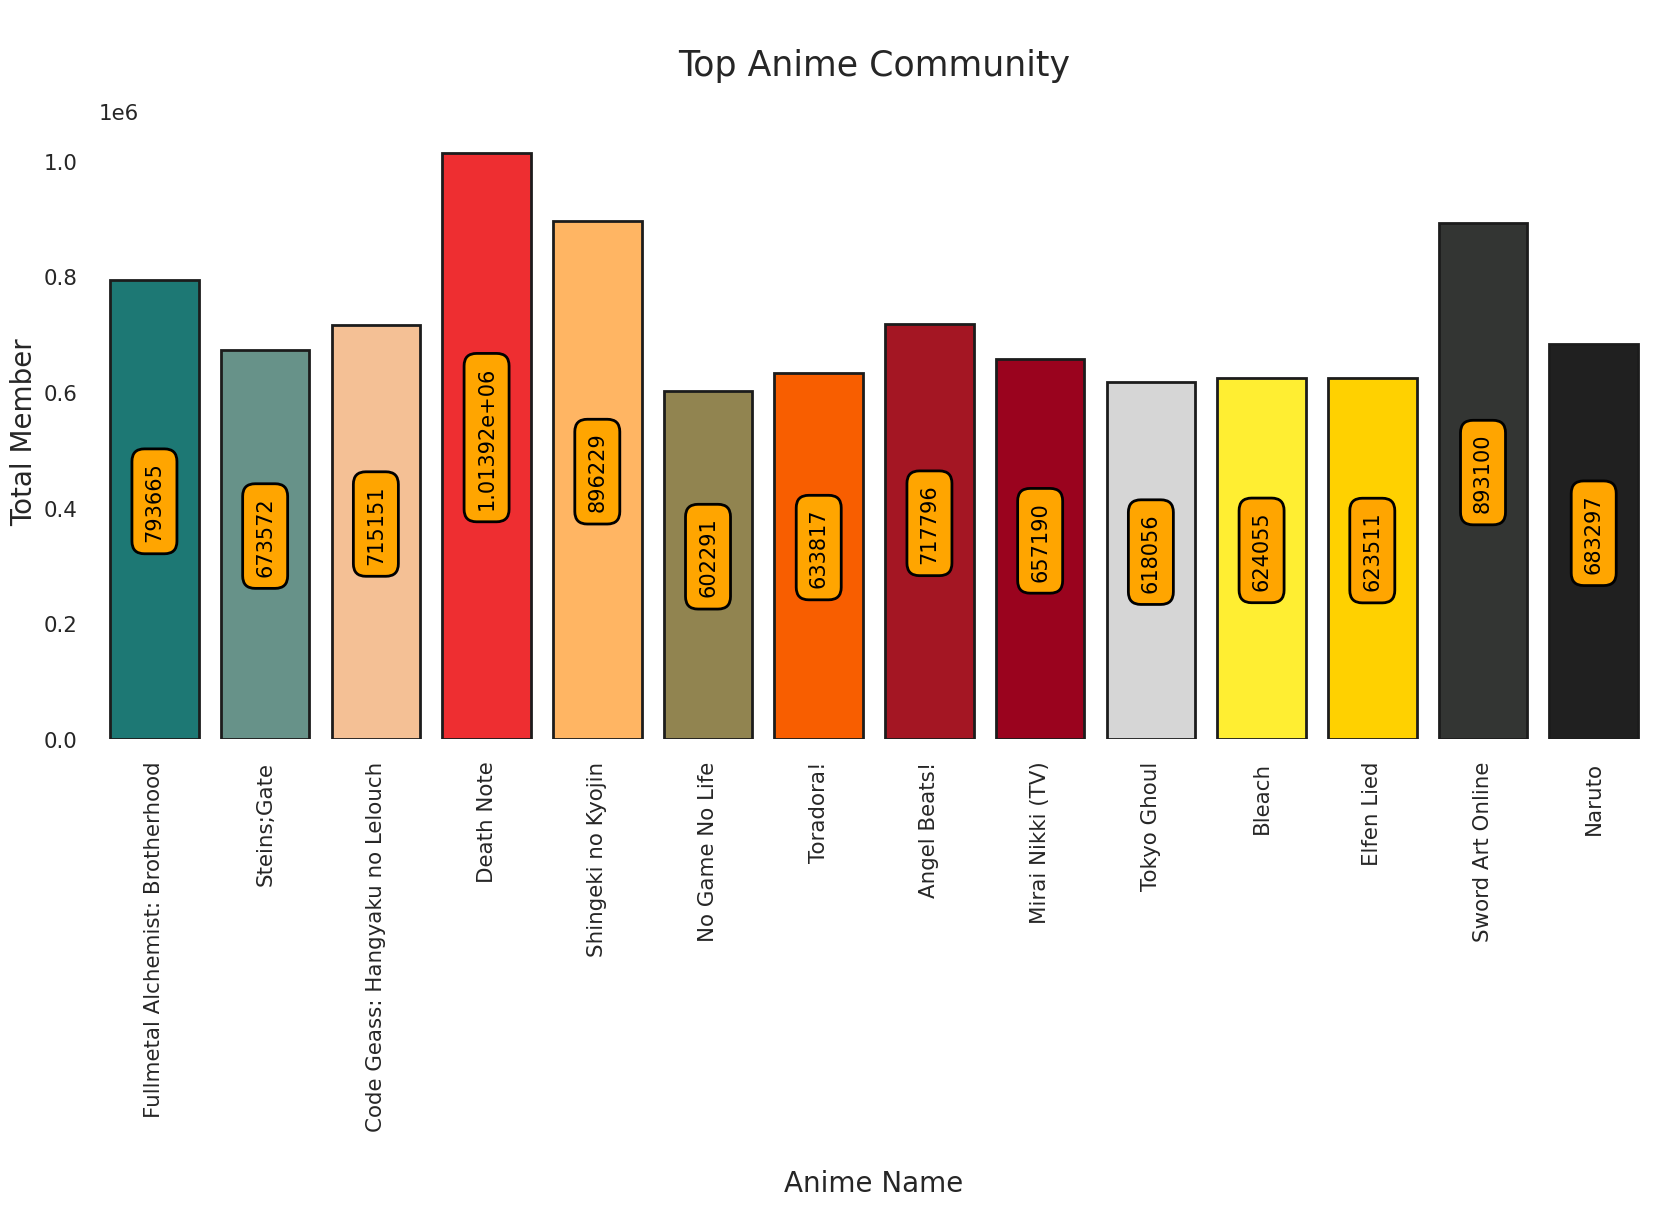

In [229]:
top_anime = fulldata.copy()
top_anime.drop_duplicates(subset ="name", keep = "first", inplace = True)
top_anime_temp1 = top_anime.sort_values(["members"],ascending=False)

plt.subplots(figsize=(20,8))
p = sns.barplot(x=top_anime_temp1["name"][:14],y=top_anime_temp1["members"],palette=palette, saturation=1, edgecolor = "#1c1c1c", linewidth = 2)
p.axes.set_title("\nTop Anime Community\n", fontsize=25)
plt.ylabel("Total Member" , fontsize = 20)
plt.xlabel("\nAnime Name" , fontsize = 20)
# plt.yscale("log")
plt.xticks(rotation = 90)
for container in p.containers:
    p.bar_label(container,label_type = "center",padding = 6,size = 15,color = "black",rotation = 90,
    bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "orange", "edgecolor": "black", "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

In [230]:
print("Anime Categories :")
top_anime_temp1["type"].value_counts().to_frame().T.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

Anime Categories :


type,TV,OVA,Movie,Special,ONA,Music
count,2780,2392,1309,1227,290,184


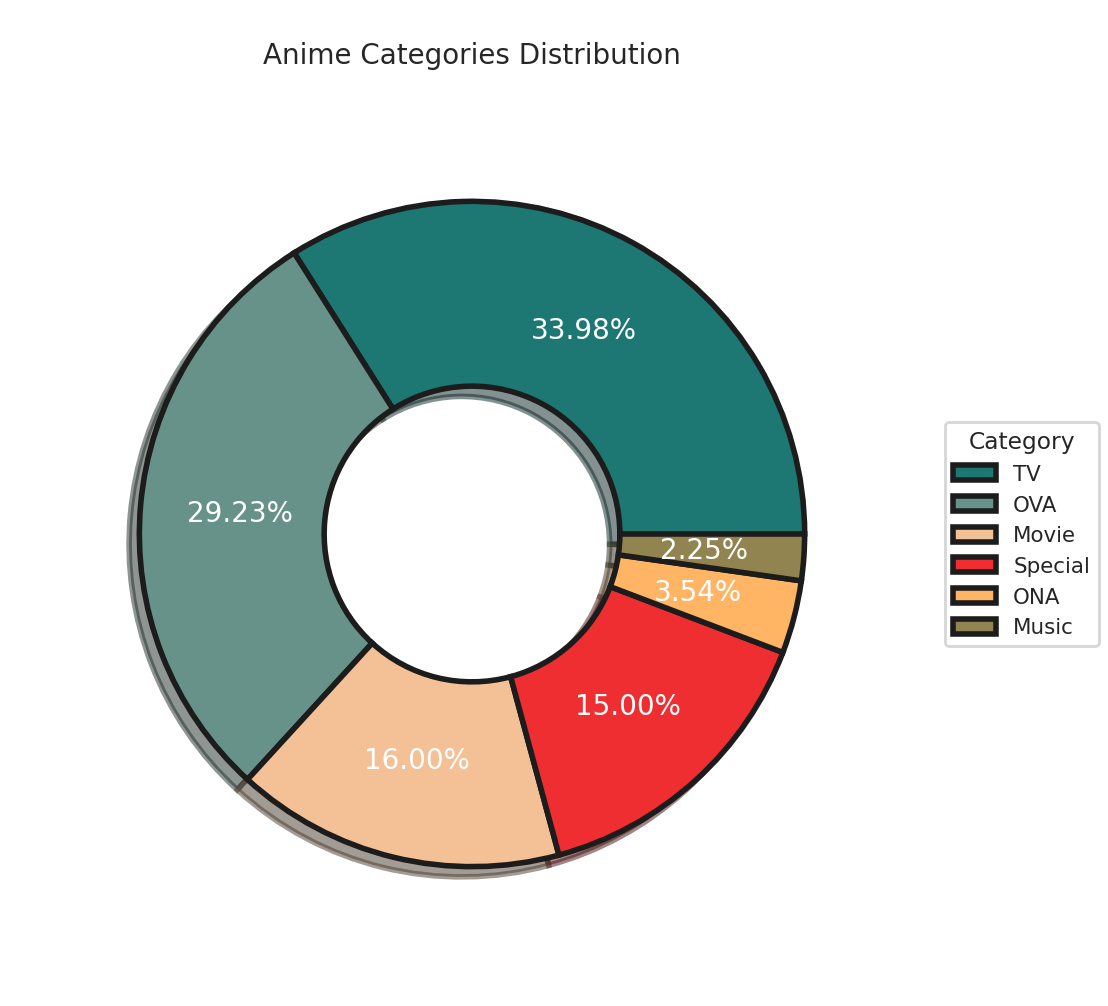

In [231]:
plt.subplots(figsize=(12, 12))

labels = "TV","OVA","Movie","Special","ONA","Music"
size = 0.5

wedges, texts, autotexts = plt.pie([len(top_anime_temp1[top_anime_temp1["type"]=="TV"]["type"]),
                                    len(top_anime_temp1[top_anime_temp1["type"]=="OVA"]["type"]),
                                    len(top_anime_temp1[top_anime_temp1["type"]=="Movie"]["type"]),
                                    len(top_anime_temp1[top_anime_temp1["type"]=="Special"]["type"]),
                                    len(top_anime_temp1[top_anime_temp1["type"]=="ONA"]["type"]),
                                    len(top_anime_temp1[top_anime_temp1["type"]=="Music"]["type"])],
                                    explode = (0,0,0,0,0,0),
                                    textprops=dict(size= 20, color= "white"),
                                    autopct="%.2f%%",
                                    pctdistance = 0.7,
                                    radius=.9,
                                    colors = palette,
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "#1c1c1c",
                                    linewidth = 4),
                                    startangle = 0)

plt.legend(wedges, labels, title="Category",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("\nAnime Categories Distribution",fontsize=20)
plt.show()

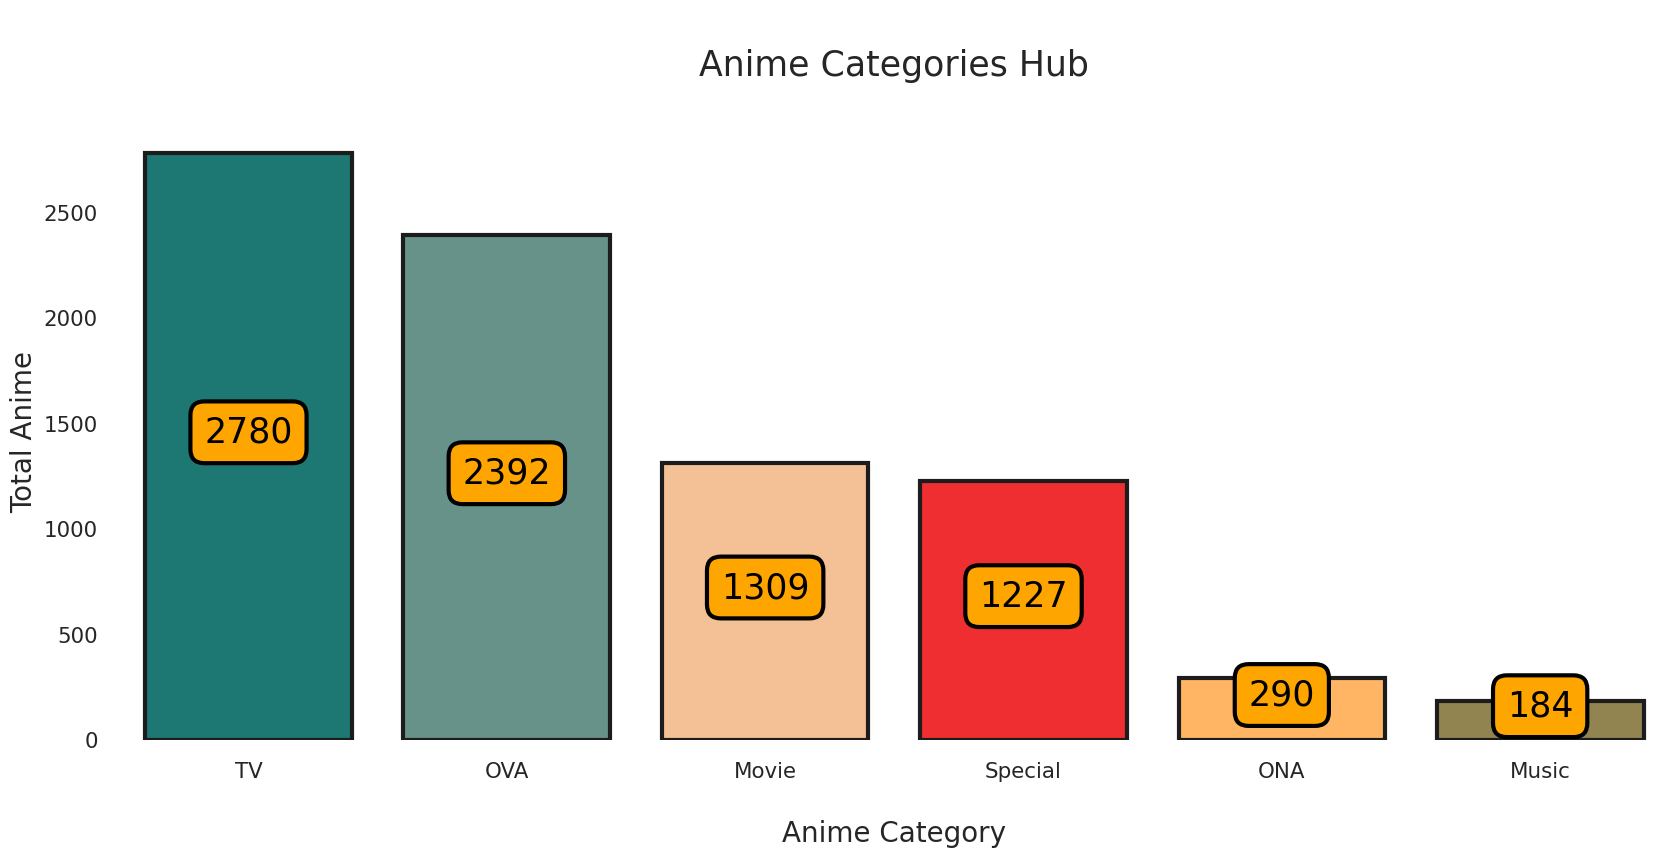

In [232]:
plt.subplots(figsize = (20,8))
p = sns.countplot(x = top_anime_temp1["type"], order = top_anime_temp1["type"].value_counts().index, palette = palette, saturation = 1, edgecolor = "#1c1c1c", linewidth = 3)
p.axes.set_title("\nAnime Categories Hub\n" ,fontsize = 25)
plt.ylabel("Total Anime" ,fontsize = 20)
plt.xlabel("\nAnime Category" ,fontsize = 20)
plt.xticks(rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type = "center",padding = 10,size = 25,color = "black",rotation = 0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "black", "linewidth" : 3, "alpha": 1})

sns.despine(left = True, bottom = True)
plt.show()

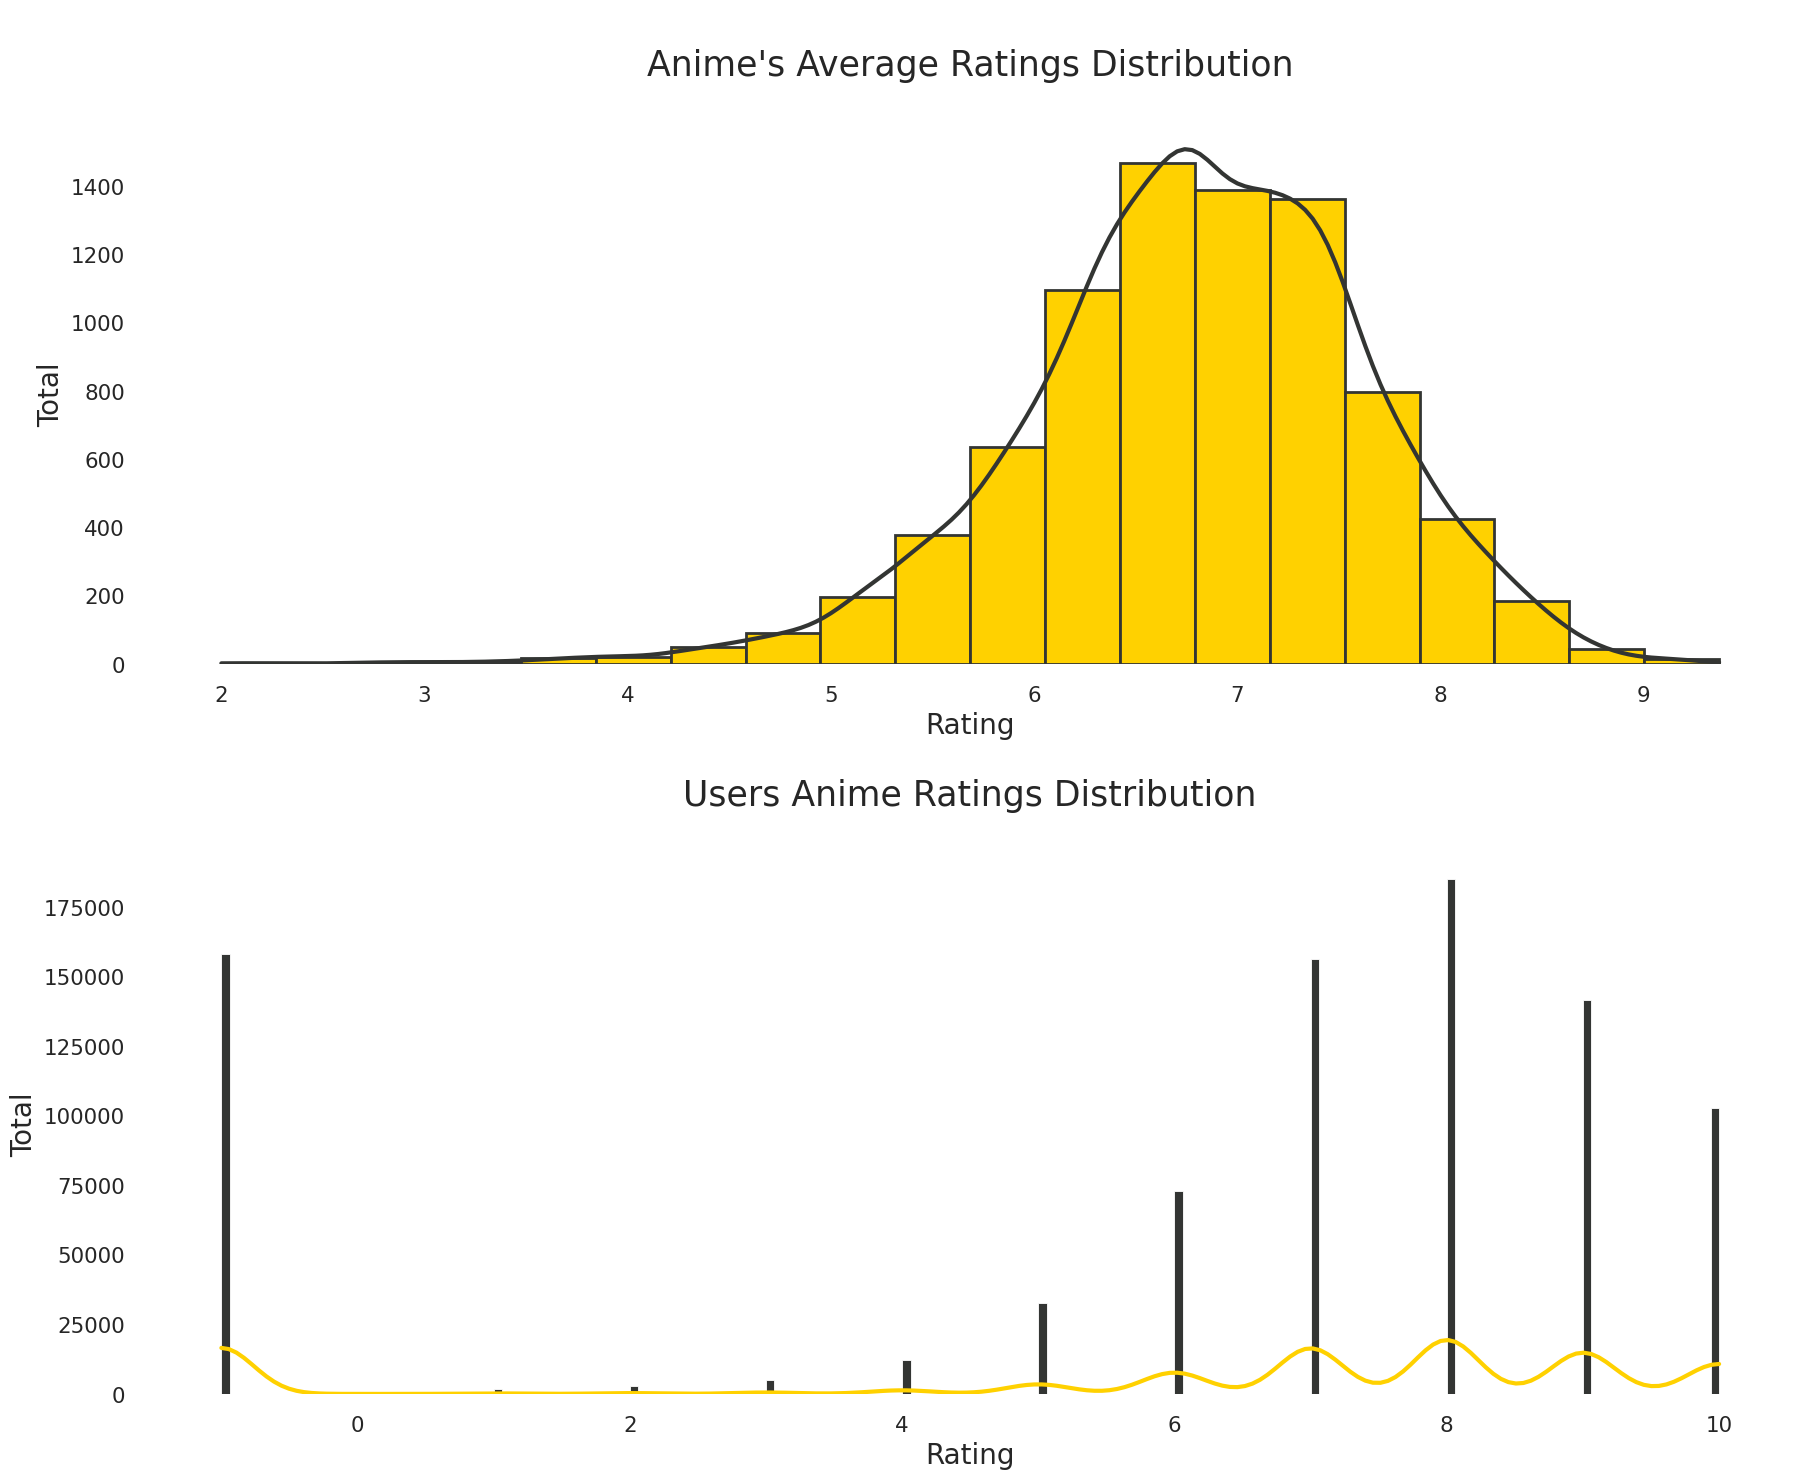

In [233]:
top_anime_temp2 = top_anime.sort_values(["rating"],ascending=False)

_, axs = plt.subplots(2,1,figsize=(20,16),sharex=False,sharey=False)
plt.tight_layout(pad=6.0)

sns.histplot(top_anime_temp2["rating"],color=palette[11],kde=True,ax=axs[0],bins=20,alpha=1,fill=True,edgecolor=palette[12])
axs[0].lines[0].set_color(palette[12])
axs[0].set_title("\nAnime's Average Ratings Distribution\n",fontsize = 25)
axs[0].set_xlabel("Rating\n", fontsize = 20)
axs[0].set_ylabel("Total", fontsize = 20)

sns.histplot(fulldata["user_rating"],color=palette[12],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True)
axs[1].lines[0].set_color(palette[11])
# axs[1].set_yscale("log")
axs[1].set_title("\n\n\nUsers Anime Ratings Distribution\n",fontsize = 25)
axs[1].set_xlabel("Rating", fontsize = 20)
axs[1].set_ylabel("Total", fontsize = 20)

sns.despine(left=True, bottom=True)
plt.show()

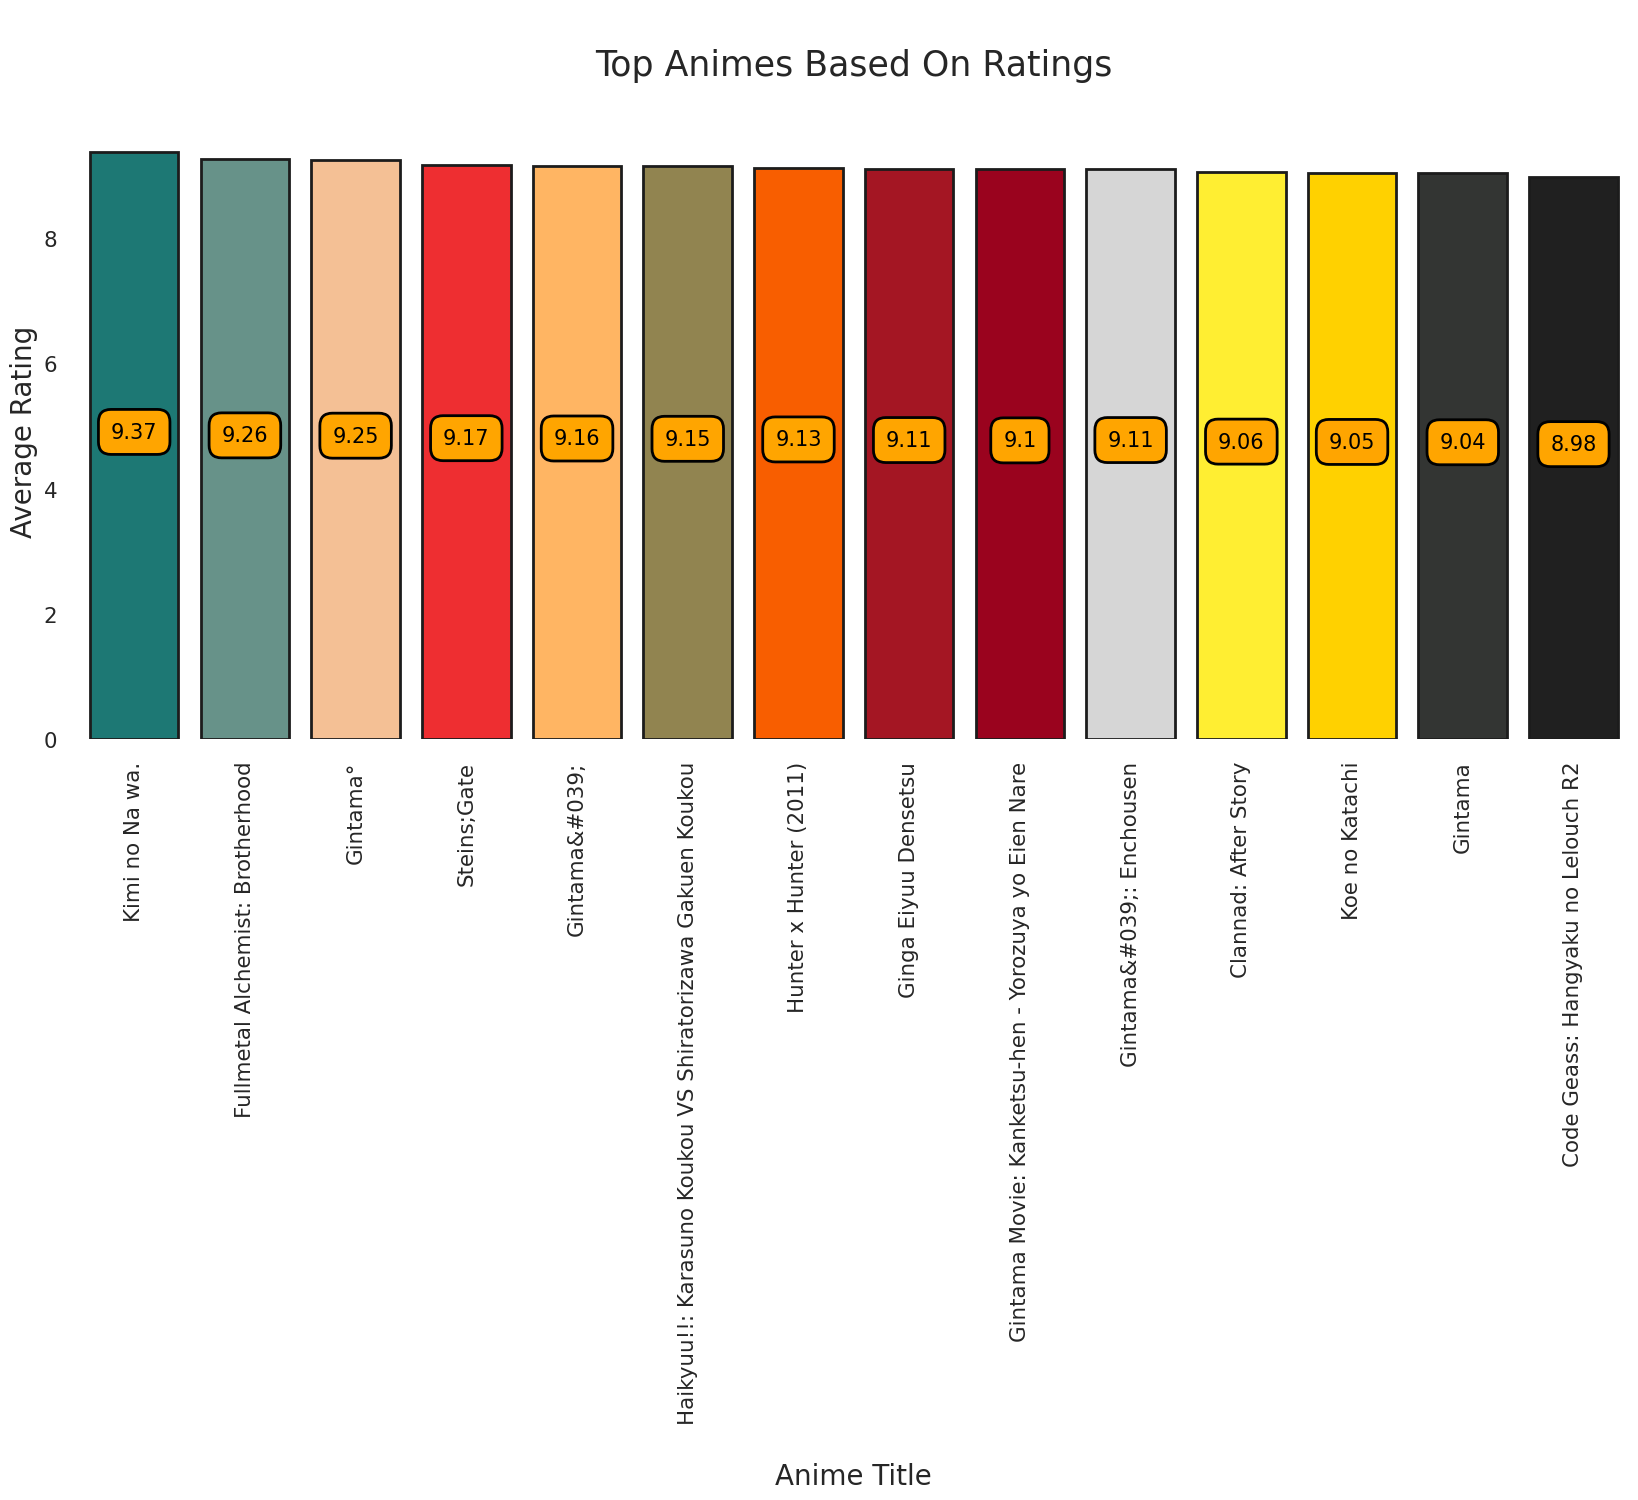

In [234]:
plt.subplots(figsize=(20,8))
p = sns.barplot(x=top_anime_temp2["name"][:14],y=top_anime_temp2["rating"],palette=palette, saturation=1, edgecolor = "#1c1c1c", linewidth = 2)
p.axes.set_title("\nTop Animes Based On Ratings\n",fontsize = 25)
plt.ylabel("Average Rating",fontsize = 20)
plt.xlabel("\nAnime Title",fontsize = 20)
# plt.yscale("log")
plt.xticks(rotation = 90)
for container in p.containers:
    p.bar_label(container,label_type = "center",padding = 10,size = 15,color = "black",rotation = 0,
    bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "orange", "edgecolor": "black", "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

Let's explore the ratings distribution of TV category :



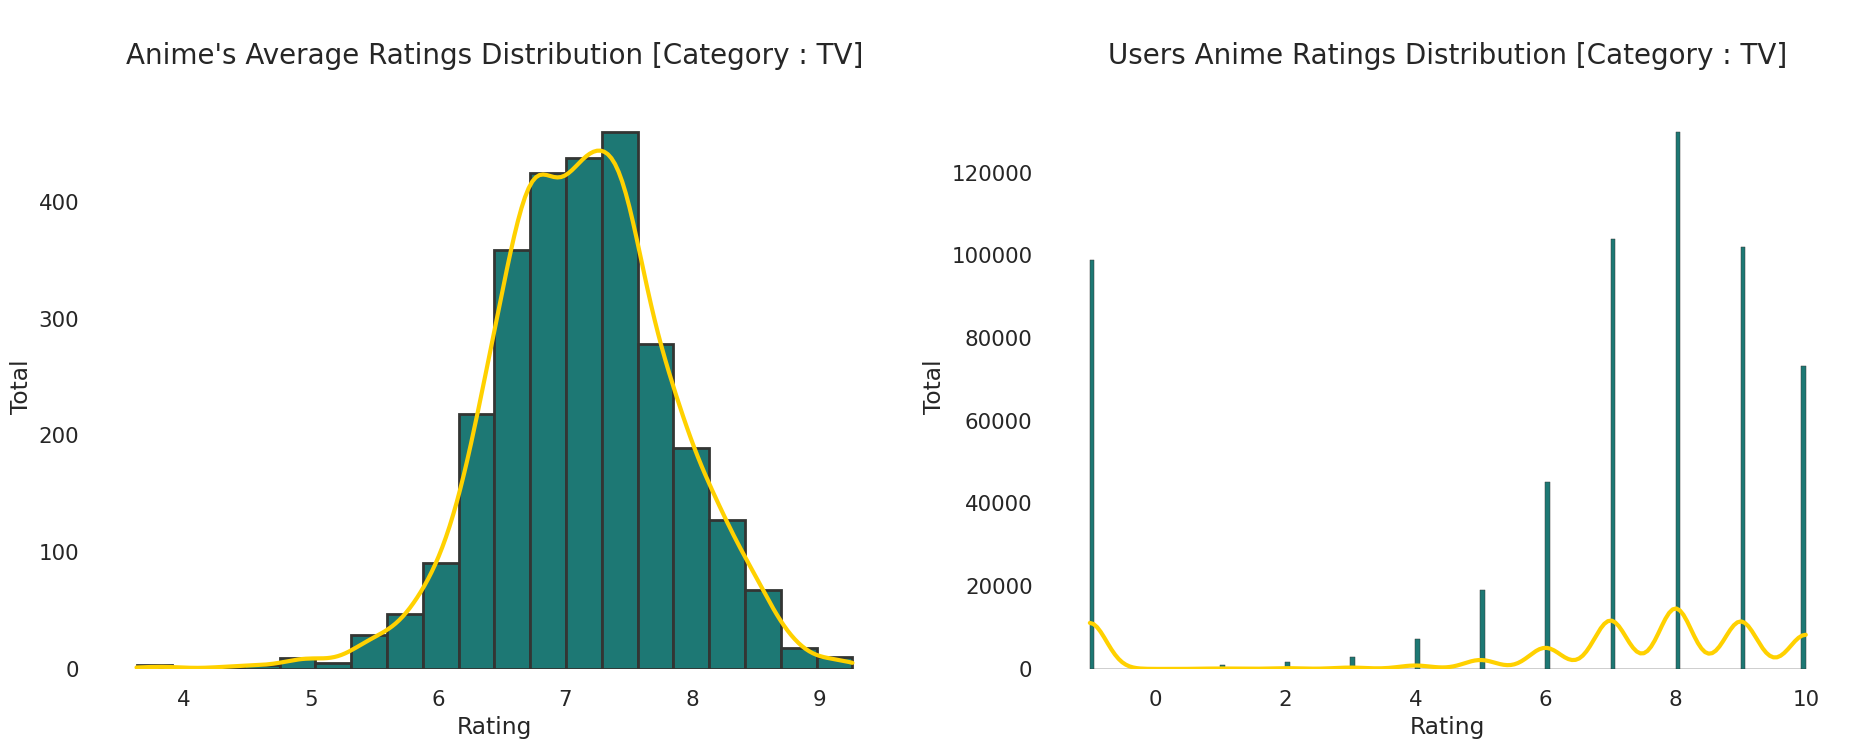

In [235]:
print("Let's explore the ratings distribution of TV category :\n")

_, axs = plt.subplots(1,2,figsize=(20,8),sharex=False,sharey=False)
plt.tight_layout(pad=4.0)

sns.histplot(top_anime_temp2[top_anime_temp2["type"]=="TV"]["rating"],color=palette[0],kde=True,ax=axs[0],bins=20,alpha=1,fill=True,edgecolor=palette[12])
axs[0].lines[0].set_color(palette[11])
axs[0].set_title("\nAnime's Average Ratings Distribution [Category : TV]\n",fontsize=20)
axs[0].set_xlabel("Rating")
axs[0].set_ylabel("Total")

sns.histplot(fulldata[fulldata["type"]=="TV"]["user_rating"],color=palette[0],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True,edgecolor=palette[12])
axs[1].lines[0].set_color(palette[11])
# axs[1].set_yscale("log")
axs[1].set_title("\nUsers Anime Ratings Distribution [Category : TV]\n",fontsize=20)
axs[1].set_xlabel("Rating")
axs[1].set_ylabel("Total")

sns.despine(left=True, bottom=True)
plt.show()

Let's explore the ratings distribution of OVA category :



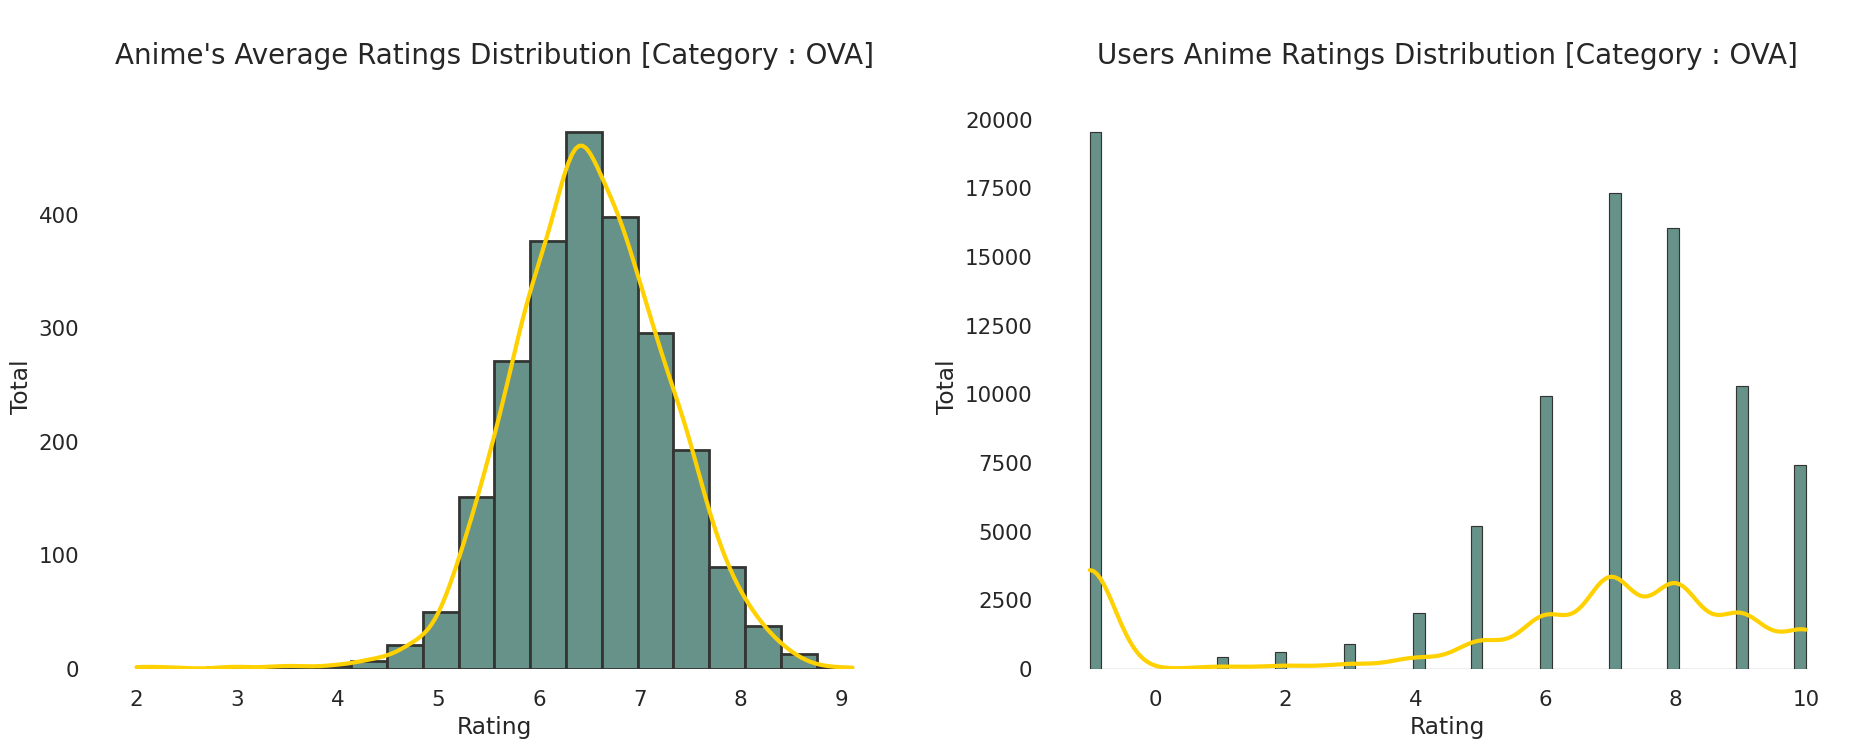

In [236]:
print("Let's explore the ratings distribution of OVA category :\n")

_, axs = plt.subplots(1,2,figsize=(20,8),sharex=False,sharey=False)
plt.tight_layout(pad=4.0)

sns.histplot(top_anime_temp2[top_anime_temp2["type"]=="OVA"]["rating"],color=palette[1],kde=True,ax=axs[0],bins=20,alpha=1,fill=True,edgecolor=palette[12])
axs[0].lines[0].set_color(palette[11])
axs[0].set_title("\nAnime's Average Ratings Distribution [Category : OVA]\n",fontsize=20)
axs[0].set_xlabel("Rating")
axs[0].set_ylabel("Total")

sns.histplot(fulldata[fulldata["type"]=="OVA"]["user_rating"],color=palette[1],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True,edgecolor=palette[12])
axs[1].lines[0].set_color(palette[11])
# axs[1].set_yscale("log")
axs[1].set_title("\nUsers Anime Ratings Distribution [Category : OVA]\n",fontsize=20)
axs[1].set_xlabel("Rating")
axs[1].set_ylabel("Total")

sns.despine(left=True, bottom=True)
plt.show()

Let's explore the ratings distribution of MOVIE category :



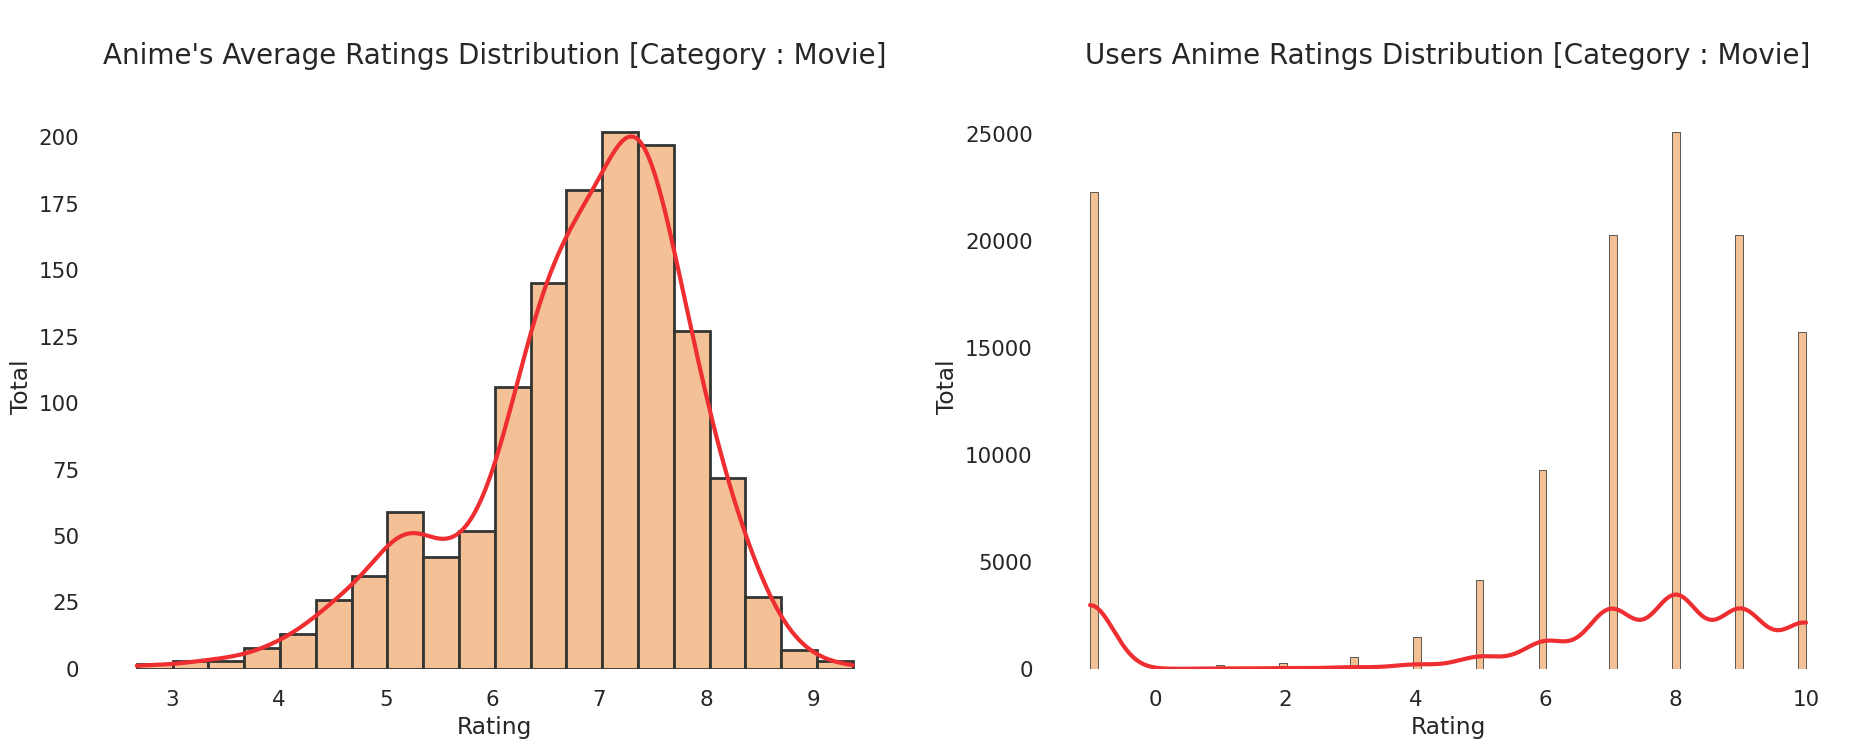

In [237]:
print("Let's explore the ratings distribution of MOVIE category :\n")

_, axs = plt.subplots(1,2,figsize=(20,8),sharex=False,sharey=False)
plt.tight_layout(pad=4.0)

sns.histplot(top_anime_temp2[top_anime_temp2["type"]=="Movie"]["rating"],color=palette[2],kde=True,ax=axs[0],bins=20,alpha=1,fill=True,edgecolor=palette[12])
axs[0].lines[0].set_color(palette[3])
axs[0].set_title("\nAnime's Average Ratings Distribution [Category : Movie]\n",fontsize=20)
axs[0].set_xlabel("Rating")
axs[0].set_ylabel("Total")

sns.histplot(fulldata[fulldata["type"]=="Movie"]["user_rating"],color=palette[2],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True,edgecolor=palette[12])
axs[1].lines[0].set_color(palette[3])
# axs[1].set_yscale("log")
axs[1].set_title("\nUsers Anime Ratings Distribution [Category : Movie]\n",fontsize=20)
axs[1].set_xlabel("Rating")
axs[1].set_ylabel("Total")

sns.despine(left=True, bottom=True)
plt.show()

Let's explore the ratings distribution of SPECIAL category :



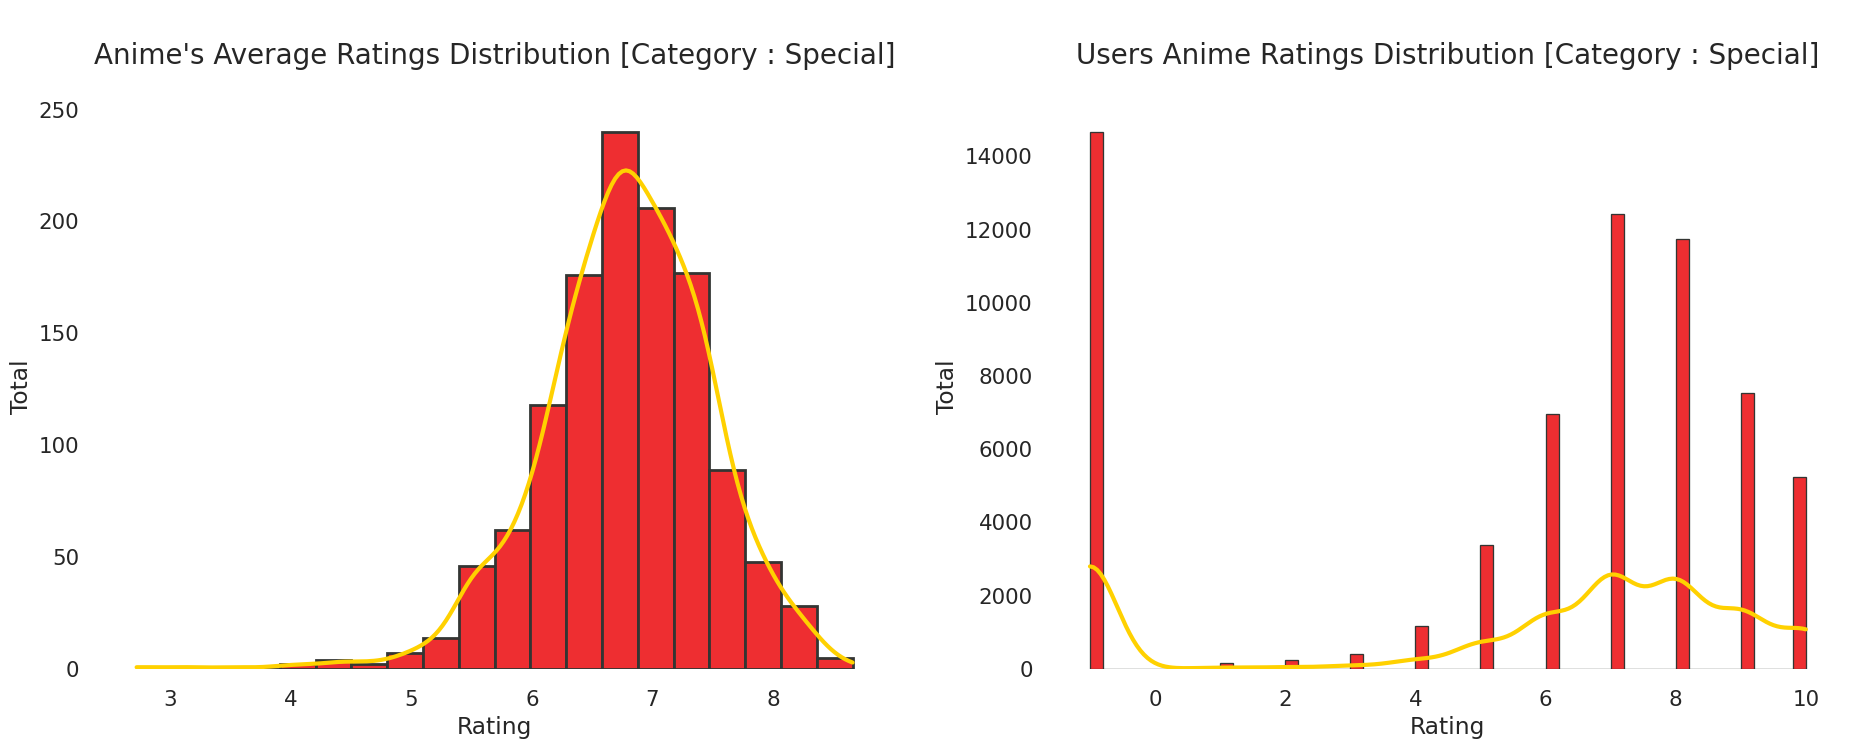

In [238]:
print("Let's explore the ratings distribution of SPECIAL category :\n")

_, axs = plt.subplots(1,2,figsize=(20,8),sharex=False,sharey=False)
plt.tight_layout(pad=4.0)

sns.histplot(top_anime_temp2[top_anime_temp2["type"]=="Special"]["rating"],color=palette[3],kde=True,ax=axs[0],bins=20,alpha=1,fill=True,edgecolor=palette[12])
axs[0].lines[0].set_color(palette[11])
axs[0].set_title("\nAnime's Average Ratings Distribution [Category : Special]\n",fontsize=20)
axs[0].set_xlabel("Rating")
axs[0].set_ylabel("Total")

sns.histplot(fulldata[fulldata["type"]=="Special"]["user_rating"],color=palette[3],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True,edgecolor=palette[12])
axs[1].lines[0].set_color(palette[11])
# axs[1].set_yscale("log")
axs[1].set_title("\nUsers Anime Ratings Distribution [Category : Special]\n",fontsize=20)
axs[1].set_xlabel("Rating")
axs[1].set_ylabel("Total")

sns.despine(left=True, bottom=True)
plt.show()

Let's explore the ratings distribution of ONA category :



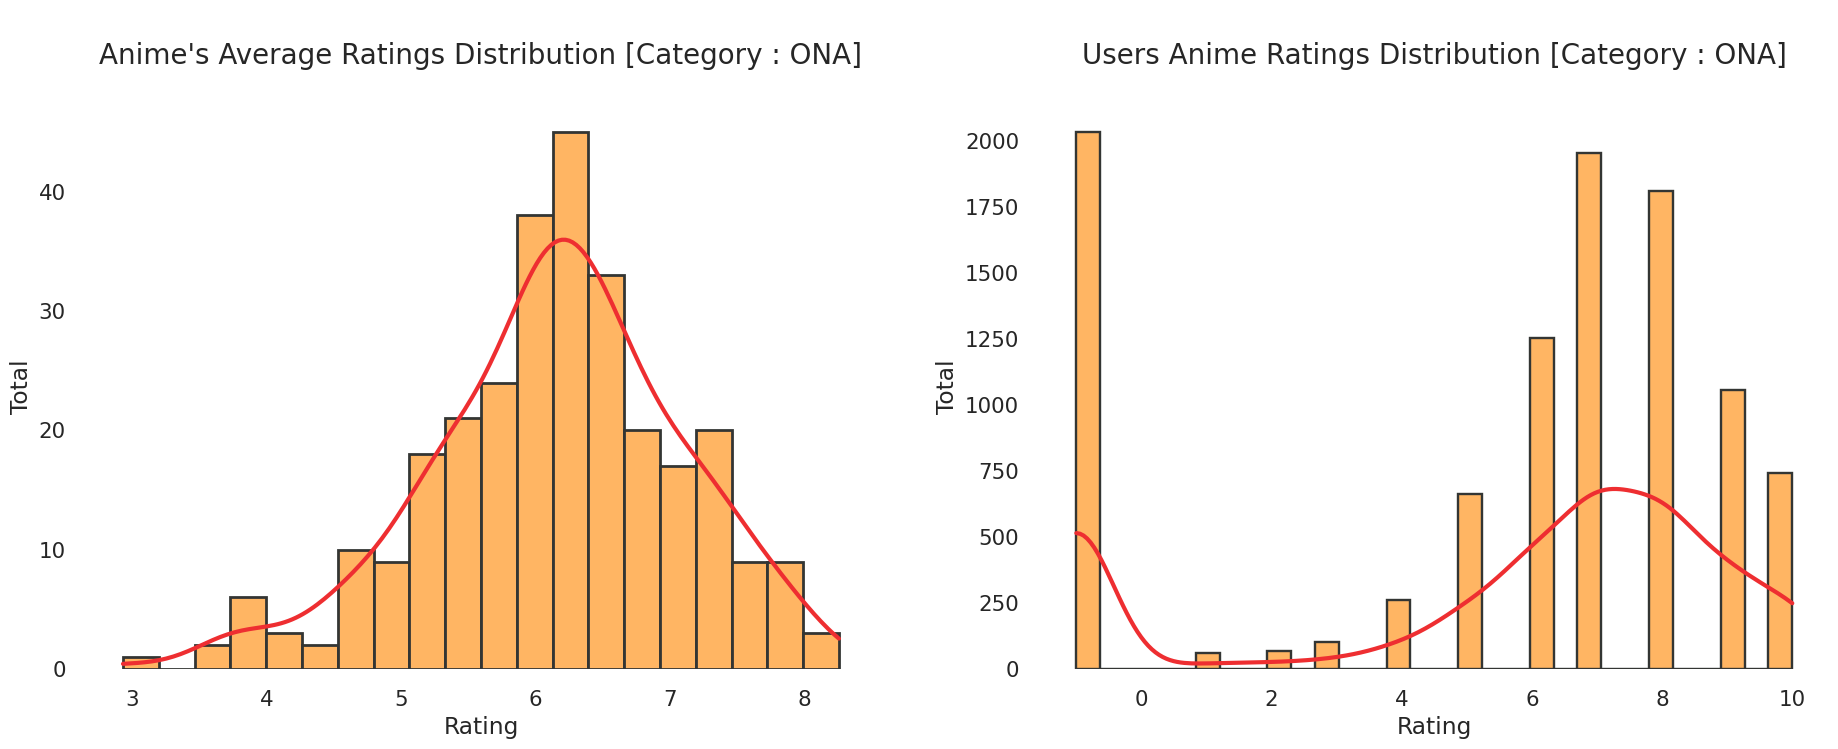

In [239]:
print("Let's explore the ratings distribution of ONA category :\n")

_, axs = plt.subplots(1,2,figsize=(20,8),sharex=False,sharey=False)
plt.tight_layout(pad=4.0)

sns.histplot(top_anime_temp2[top_anime_temp2["type"]=="ONA"]["rating"],color=palette[4],kde=True,ax=axs[0],bins=20,alpha=1,fill=True,edgecolor=palette[12])
axs[0].lines[0].set_color(palette[3])
axs[0].set_title("\nAnime's Average Ratings Distribution [Category : ONA]\n",fontsize=20)
axs[0].set_xlabel("Rating")
axs[0].set_ylabel("Total")

sns.histplot(fulldata[fulldata["type"]=="ONA"]["user_rating"],color=palette[4],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True,edgecolor=palette[12])
axs[1].lines[0].set_color(palette[3])
# axs[1].set_yscale("log")
axs[1].set_title("\nUsers Anime Ratings Distribution [Category : ONA]\n",fontsize=20)
axs[1].set_xlabel("Rating")
axs[1].set_ylabel("Total")

sns.despine(left=True, bottom=True)
plt.show()

Let's explore the ratings distribution of MUSIC category :



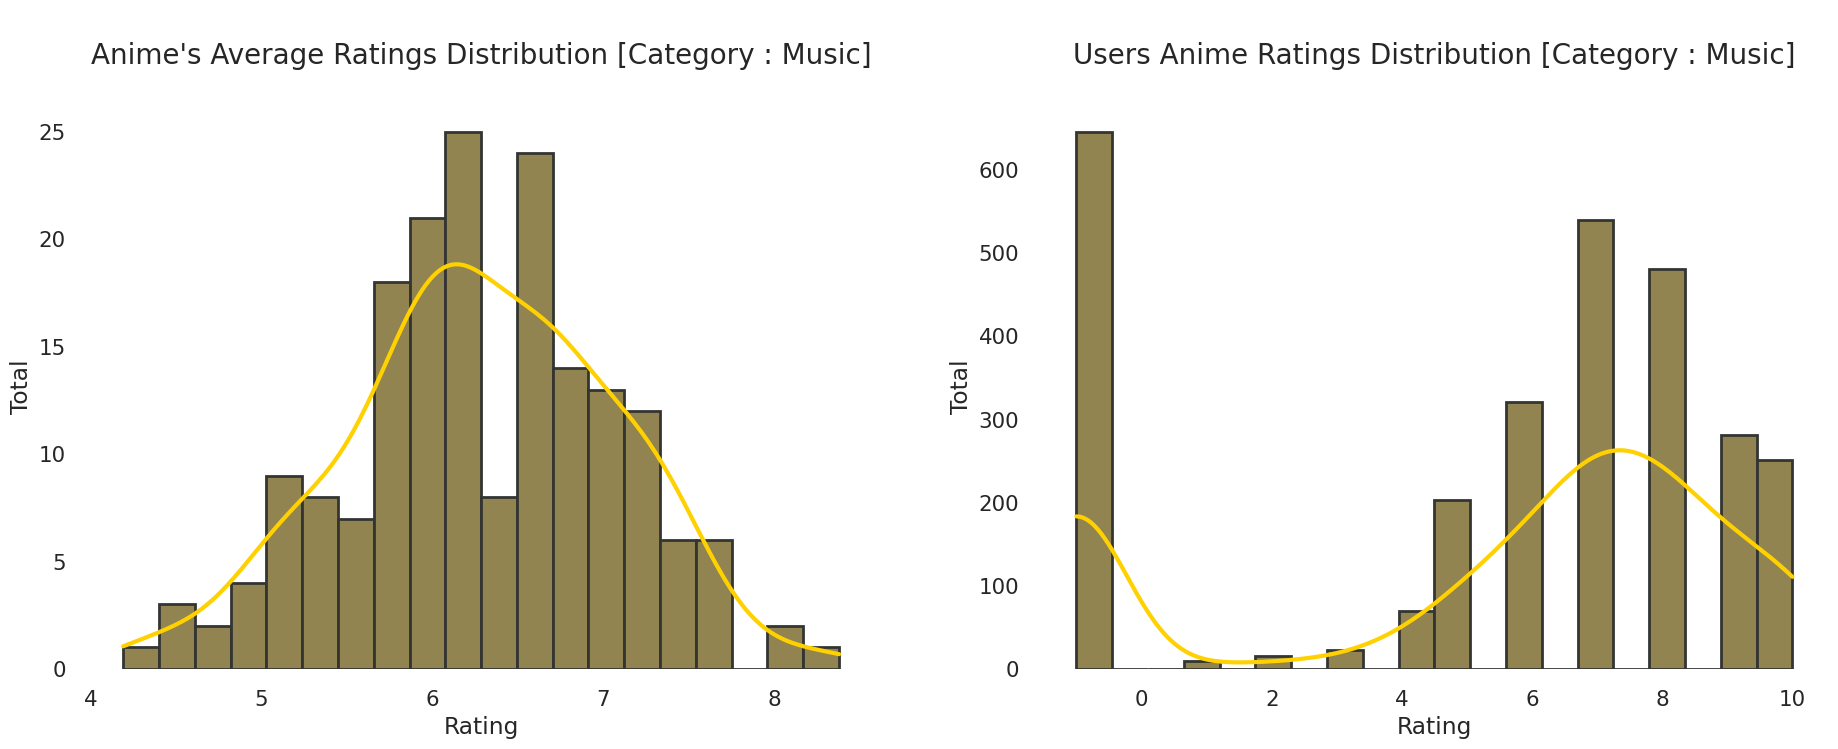

In [240]:
print("Let's explore the ratings distribution of MUSIC category :\n")

_, axs = plt.subplots(1,2,figsize=(20,8),sharex=False,sharey=False)
plt.tight_layout(pad=4.0)

sns.histplot(top_anime_temp2[top_anime_temp2["type"]=="Music"]["rating"],color=palette[5],kde=True,ax=axs[0],bins=20,alpha=1,fill=True,edgecolor=palette[12])
axs[0].lines[0].set_color(palette[11])
axs[0].set_title("\nAnime's Average Ratings Distribution [Category : Music]\n",fontsize=20)
axs[0].set_xlabel("Rating")
axs[0].set_ylabel("Total")

sns.histplot(fulldata[fulldata["type"]=="Music"]["user_rating"],color=palette[5],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True,edgecolor=palette[12])
axs[1].lines[0].set_color(palette[11])
# axs[1].set_yscale("log")
axs[1].set_title("\nUsers Anime Ratings Distribution [Category : Music]\n",fontsize=20)
axs[1].set_xlabel("Rating")
axs[1].set_ylabel("Total")

sns.despine(left=True, bottom=True)
plt.show()

In [241]:
top_anime_temp3 = top_anime[["genre"]]
top_anime_temp3["genre"] = top_anime_temp3["genre"].str.split(", | , | ,")
top_anime_temp3 = top_anime_temp3.explode("genre")
top_anime_temp3["genre"] = top_anime_temp3["genre"].str.title()

print(f'Total unique genres are {len(top_anime_temp3["genre"].unique())}')
print(f'Occurances of unique genres :')
top_anime_temp3["genre"].value_counts().to_frame().T.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

Total unique genres are 43
Occurances of unique genres :


genre,Comedy,Action,Adventure,Sci-Fi,Fantasy,Drama,Shounen,Romance,School,Hentai,Supernatural,Slice Of Life,Mecha,Magic,Ecchi,Kids,Shoujo,Historical,Seinen,Mystery,Music,Super Power,Military,Sports,Harem,Space,Horror,Parody,Demons,Martial Arts,Psychological,Police,Game,Samurai,Dementia,Vampire,Thriller,Shounen Ai,Shoujo Ai,Josei,Cars,Yuri,Yaoi
count,3256,2300,1724,1700,1613,1493,1448,1314,1014,965,872,825,784,636,577,493,480,464,443,428,418,382,377,359,302,298,287,281,242,216,198,165,135,112,92,92,81,57,54,49,44,39,37


let's explore how genre's wordcloud looks like



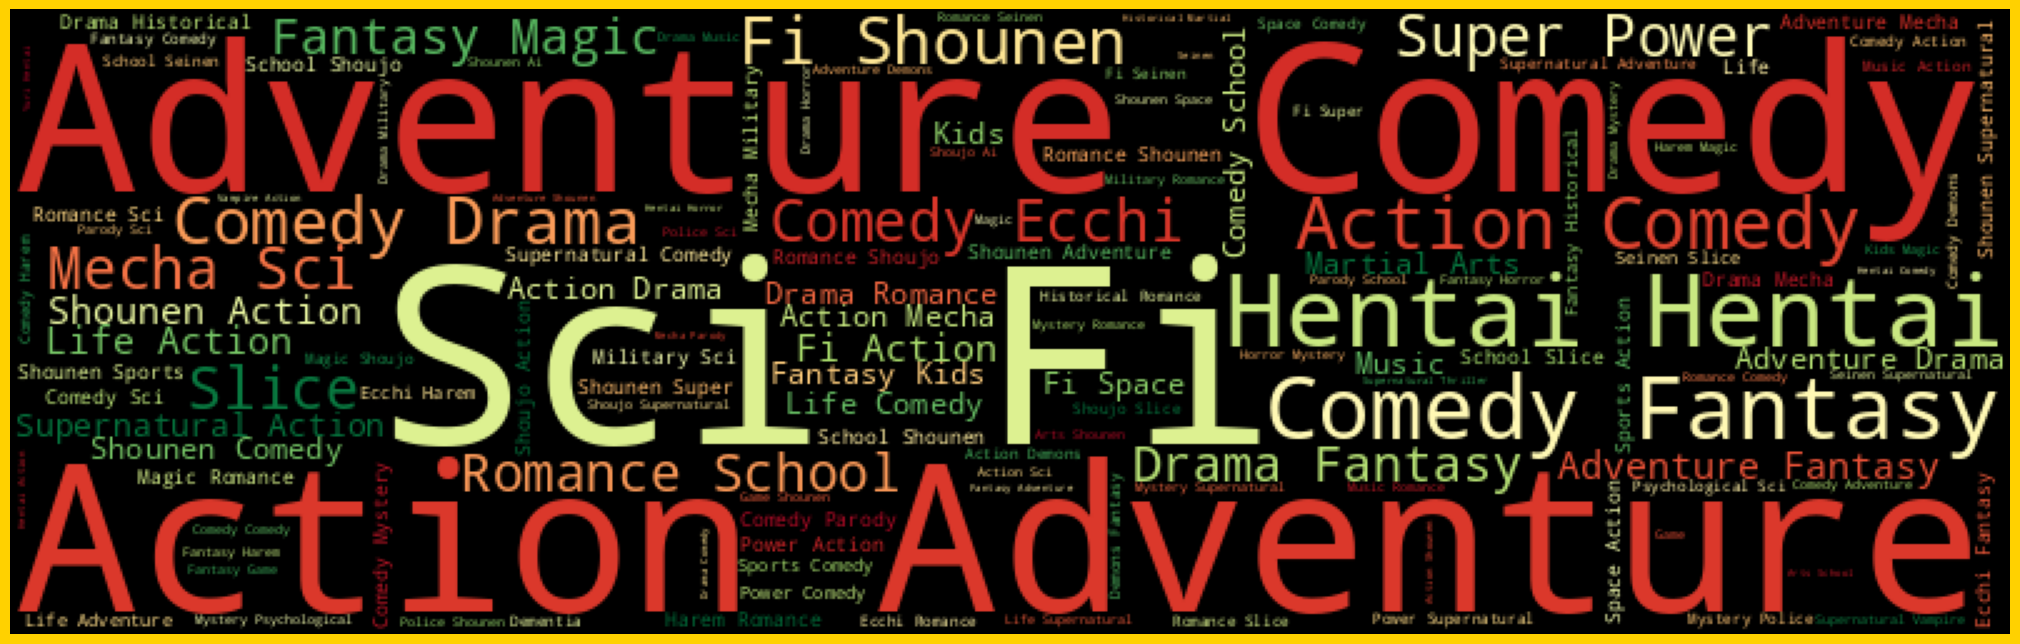

In [242]:
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 250, background_color ="black",colormap ="RdYlGn",
                      max_font_size=100, stopwords =None,repeat= True).generate(top_anime["genre"].str.cat(sep=", | , | ,"))

print("let's explore how genre's wordcloud looks like\n")
plt.figure(figsize = (20, 8),facecolor = "#ffd100")
plt.imshow(wordcloud)
plt.axis("off")
plt.margins(x = 0, y = 0)
plt.tight_layout(pad = 0)
plt.show()

In [243]:
#Final Pre-processing
data = fulldata.copy()
data["user_rating"].replace(to_replace = -1 , value = np.nan ,inplace=True)
data = data.dropna(axis = 0)
print("Null values after final pre-processing :")
data.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

Null values after final pre-processing :


,anime_id,name,genre,type,episodes,rating,members,user_id,user_rating
0,0,0,0,0,0,0,0,0,0


In [244]:
selected_users = data["user_id"].value_counts()
data = data[data["user_id"].isin(selected_users[selected_users >= 50].index)]

In [245]:
data_pivot_temp = data.pivot_table(index="name",columns="user_id",values="user_rating").fillna(0)
data_pivot_temp.head()

user_id,3,5,7,11,14,17,21,23,24,27,...,7930,7931,7932,7933,7935,7937,7938,7939,7941,7942
name,,,,,,,,,,,,,,,,,,,,,
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Memoire,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Movie,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
.hack//G.U. Returner,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
.hack//G.U. Trilogy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [246]:
#cleaning anime name
import re
def text_cleaning(text):
    text = re.sub(r'&quot;', '', text)
    text = re.sub(r'.hack//', '', text)
    text = re.sub(r'&#039;', '', text)
    text = re.sub(r'A&#039;s', '', text)
    text = re.sub(r'I&#039;', 'I\'', text)
    text = re.sub(r'&amp;', 'and', text)

    return text

data["name"] = data["name"].apply(text_cleaning)

In [247]:
data_pivot = data.pivot_table(index="name",columns="user_id",values="user_rating").fillna(0)
print("After Cleaning the animes names, let's see how it looks like.")
data_pivot.head()

After Cleaning the animes names, let's see how it looks like.


user_id,3,5,7,11,14,17,21,23,24,27,...,7930,7931,7932,7933,7935,7937,7938,7939,7941,7942
name,,,,,,,,,,,,,,,,,,,,,
009 Re:Cyborg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
009-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
009-1: RandB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00:08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
07-Ghost,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9.0,7.0,0.0,0.0


*** FOR RECOMMENDATIONS KNN, COSINE SIMILARITY USED ***

In [248]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

data_matrix = csr_matrix(data_pivot.values)

model_knn = NearestNeighbors(metric = "cosine", algorithm = "brute")
model_knn.fit(data_matrix)

query_no = np.random.choice(data_pivot.shape[0]) # random anime title and finding recommendation
print(f"We will find recommendation for {query_no} no anime which is {data_pivot.index[query_no]}.")
distances, indices = model_knn.kneighbors(data_pivot.iloc[query_no,:].values.reshape(1, -1), n_neighbors = 6)

We will find recommendation for 7407 no anime which is Witchblade.


In [249]:
no = []
name = []
distance = []
rating = []

for i in range(0, len(distances.flatten())):
    if i == 0:
        print(f"Recommendations for {data_pivot.index[query_no]} viewers :\n")
    else:
        no.append(i)
        name.append(data_pivot.index[indices.flatten()[i]])
        distance.append(distances.flatten()[i])
        rating.append(*anime[anime["name"]==data_pivot.index[indices.flatten()[i]]]["rating"].values)

dic = {"No" : no, "Anime Name" : name, "Rating" : rating}
recommendation = pd.DataFrame(data = dic)
recommendation.set_index("No", inplace = True)
recommendation.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

Recommendations for Witchblade viewers :



,Anime Name,Rating
No,,
1,Bakuretsu Tenshi,6.940000
2,Claymore,7.920000
3,Blood+,7.800000
4,Sekirei,7.400000
5,Ikkitousen,6.620000


In [250]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfv = TfidfVectorizer(min_df=3, max_features=None, strip_accents="unicode", analyzer="word",
                      token_pattern=r"\w{1,}", ngram_range=(1, 3), stop_words = "english")

rec_data = fulldata.copy()
rec_data.drop_duplicates(subset ="name", keep = "first", inplace = True)
rec_data.reset_index(drop = True, inplace = True)
genres = rec_data["genre"].str.split(", | , | ,").astype(str)
tfv_matrix = tfv.fit_transform(genres)

In [251]:
from sklearn.metrics.pairwise import sigmoid_kernel

sig = sigmoid_kernel(tfv_matrix, tfv_matrix)      # Computing sigmoid kernel

rec_indices = pd.Series(rec_data.index, index = rec_data["name"]).drop_duplicates()


# Recommendation Function
def give_recommendation(title, sig = sig):

    idx = rec_indices[title] # Getting index corresponding to original_title

    sig_score = list(enumerate(sig[idx]))  # Getting pairwsie similarity scores
    sig_score = sorted(sig_score, key=lambda x: x[1], reverse=True)
    sig_score = sig_score[1:11]
    anime_indices = [i[0] for i in sig_score]

    # Top 10 most similar movies
    rec_dic = {"No" : range(1,11),
               "Anime Name" : anime["name"].iloc[anime_indices].values,
               "Rating" : anime["rating"].iloc[anime_indices].values}
    dataframe = pd.DataFrame(data = rec_dic)
    dataframe.set_index("No", inplace = True)

    print(f"Recommendations for {title} viewers :\n")

    return dataframe.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

In [252]:
give_recommendation("Naruto")

Recommendations for Naruto viewers :



,Anime Name,Rating
No,,
1,Macross Plus Movie Edition,7.820000
2,Waga Seishun no Arcadia,7.700000
3,Acchi Kocchi,7.590000
4,Sunabouzu,7.550000
5,Honoo no Toukyuuji: Dodge Danpei,7.510000
6,Fullmetal Alchemist: The Sacred Star of Milos Specials,7.270000
7,Generator Gawl,7.130000
8,Inishie no Megami to Houseki no Ite,5.900000
9,Yu Bang Xiang Zheng,5.980000


In [253]:
give_recommendation("Death Note")

Recommendations for Death Note viewers :



,Anime Name,Rating
No,,
1,Sora no Otoshimono: Forte,7.860000
2,Kyoukai no Kanata Movie: I'll Be Here - Kako-hen,7.750000
3,Major S1,8.420000
4,Shin Chou Kyou Ryo: Condor Hero III,7.580000
5,Show By Rock!!: Plasmagica na Gogo,5.850000
6,ef: A Tale of Melodies.,8.180000
7,Initial D Battle Stage,7.630000
8,Ginga Tetsudou no Yoru,7.430000
9,Kizumonogatari II: Nekketsu-hen,8.730000


In [261]:
give_recommendation("Major S1")

Recommendations for Major S1 viewers :



,Anime Name,Rating
No,,
1,Natsume Yuujinchou Go,8.760000
2,Haikyuu!!,8.680000
3,Rurouni Kenshin: Meiji Kenkaku Romantan,8.430000
4,One Piece Film: Strong World,8.420000
5,Saint Seiya: The Lost Canvas - Meiou Shinwa 2,8.360000
6,Kaiba,8.290000
7,ReLIFE,8.240000
8,Dragon Ball,8.160000
9,Nanatsu no Taizai OVA,7.850000


***ASSOCIATION RULE APPLIED TO GENERATE USER PREFERENCES AND PATTERNS***

In [255]:
print(merged_data.columns)  # or any DataFrame you suspect is causing the issue


Index(['user_id', 'anime_id', 'rating_x', 'name', 'genre', 'type', 'episodes',
       'rating_y', 'members'],
      dtype='object')


In [256]:
# Assuming you're interested in user ratings (rating_x) where users rated animes highly
high_rating_threshold = 8  # Adjust threshold as needed
high_ratings = merged_data[merged_data['rating_x'] >= high_rating_threshold]


In [257]:
# Create a basket format where each row contains data for one user
basket = high_ratings.groupby(['user_id', 'name'])['rating_x'].sum().unstack().fillna(0)
basket_sets = basket.applymap(lambda x: 1 if x > 0 else 0)


In [258]:
from mlxtend.frequent_patterns import apriori, association_rules
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)  # adjust support as needed
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)  # adjust confidence


In [259]:
strong_rules = rules[(rules['lift'] >= 1.2) & (rules['confidence'] >= 0.5)]  # adjust these thresholds as needed
print(strong_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


                                            antecedents  \
0                                      (Akame ga Kill!)   
1     (Ano Hi Mita Hana no Namae wo Bokutachi wa Mad...   
2                                             (Another)   
3                                      (Bakemonogatari)   
4                      (Chuunibyou demo Koi ga Shitai!)   
...                                                 ...   
1301  (Code Geass: Hangyaku no Lelouch, Shingeki no ...   
1302  (Shingeki no Kyojin, Steins;Gate, Code Geass: ...   
1303  (Code Geass: Hangyaku no Lelouch, Steins;Gate,...   
1304     (Code Geass: Hangyaku no Lelouch, Steins;Gate)   
1305  (Steins;Gate, Code Geass: Hangyaku no Lelouch R2)   

                                            consequents   support  confidence  \
0                                  (Shingeki no Kyojin)  0.071965    0.757405   
1                                        (Angel Beats!)  0.109756    0.632432   
2                                        (Angel 

***Interpreting the Results:***

*   Antecedents: This column shows sets of anime that users have rated or watched together.
*   Consequents: This column lists anime that are likely to be enjoyed by users who liked the antecedents.
*   Support: This metric indicates how frequently the itemset appears in all transactions. For example, a support of 0.071965 for (Akame ga Kill!) -> (Shingeki no Kyojin) means that this combination appears in about 7.2% of all transactions in your dataset.
* Confidence: This shows the likelihood of the consequent being true when the antecedent is true. For instance, there is about 75.7% confidence that someone who likes "Akame ga Kill!" will also like "Shingeki no Kyojin".
* Lift: This indicates how much more likely the consequent is bought with the antecedent compared to its occurrence across all transactions. Lift values greater than 1 suggest that the antecedent and consequent are likely to be bought together more often than random chance. For example, the lift of 2.247 for the same rule suggests that liking "Akame ga Kill!" increases the likelihood of liking "Shingeki no Kyojin" by about 2.25 times over random chance.



In [263]:
def recommend_anime(anime_title, rules, top_n=5):
    # Filter rules by the input anime title
    relevant_rules = rules[rules['antecedents'].apply(lambda x: anime_title in x)]
    if relevant_rules.empty:
        print(f"No recommendations found for {anime_title}. Try another anime.")
        return pd.DataFrame()
    # Sort rules by confidence and lift
    recommendations = relevant_rules.sort_values(by=['confidence', 'lift'], ascending=False).head(top_n)
    return recommendations[['consequents', 'confidence', 'lift']]

# Example usage:
anime_title = "Akame ga Kill!"
recommendations = recommend_anime(anime_title, strong_rules)
print(f"Recommendations for {anime_title} viewers:\n", recommendations)


Recommendations for Akame ga Kill! viewers:
             consequents  confidence      lift
0  (Shingeki no Kyojin)    0.757405  2.247219


Based on these rules, you can recommend anime that not only fit a user's known preferences but also are statistically significant in terms of user behavior patterns:

* For Users Who Like Multiple Anime: For users who like combinations such as (Code Geass: Hangyaku no Lelouch, Shingeki no Kyojin, Steins;Gate), you can recommend other highly related titles like "Death Note" which appears frequently as a consequent with high lift and confidence values.

* Tailored Recommendations: Utilize these rules to create personalized recommendations by checking which sets of antecedents a user has already interacted with or rated highly, and then suggesting the consequents of these sets.

* Marketing and Promotion: Anime streaming platforms or stores could use these rules for marketing, by bundling highly associated anime together or promoting them during similar screenings.